# Setup

In [ ]:
#!pip install --user --upgrade pip 

     |████████████████████████████████| 1.7 MB 6.6 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support, classification_report
import torch.nn as nn
import torch.optim as optim
!pip install -U transformers
import seaborn as sns
import torch 
from transformers import AutoModel, AutoTokenizer, Trainer, TrainingArguments, BertForSequenceClassification, BertTokenizerFast
!pip install -U sentence_transformers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 7.1 MB/s 
     |████████████████████████████████| 101 kB 12.9 MB/s 
     |████████████████████████████████| 596 kB 96.1 MB/s 
     |████████████████████████████████| 6.6 MB 85.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.1 MB/s 
     |████████████████████████████████| 1.2 MB 47.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=04511829fd48674339bd6602638ebb68fe93648918dfceb305232c14b3a7bc4a
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built s

In [2]:
torch.manual_seed(1234)
device = torch.device('cuda')
torch.cuda.get_device_name(device=None)


'Tesla P100-PCIE-16GB'

In [3]:
# Mount google drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
os.chdir('/content/drive/My Drive')

In [5]:
cap_deu = pd.read_csv(os.path.join("Hung's paper", "cap_data_cleaned.csv"))

In [ ]:
cap_deu.head(5)

,Unnamed: 0,election_year,party_name,party_id,manifesto_id,sentence_id,cap_topic,cap_subtopic,header,junk,eu_dummy,sentence_text
0,1,1949,SPD,1,19491,1,99,99,1,0,0,Für ein freies Deutschland
1,2,1949,SPD,1,19491,2,99,99,0,0,0,Wählerinnen und Wähler!
2,3,1949,SPD,1,19491,3,99,99,0,0,0,"Am 14. August entscheidet XX darüber, wie ein ..."
3,4,1949,SPD,1,19491,4,20,2099,0,0,0,Heute ist unser land geteilt.
4,5,1949,SPD,1,19491,5,20,2099,0,0,0,Swjetrussland hat seine Besatzungszone separiert.


In [ ]:
cap_deu.groupby('cap_topic').count()

,Unnamed: 0,election_year,party_name,party_id,manifesto_id,sentence_id,cap_subtopic,header,junk,eu_dummy,sentence_text
cap_topic,,,,,,,,,,,
0,2,2,2,2,2,2,2,2,2,2,2
1,7127,7127,7127,7127,7127,7127,7127,7127,7127,7127,7127
2,5094,5094,5094,5094,5094,5094,5094,5094,5094,5094,5094
3,3014,3014,3014,3014,3014,3014,3014,3014,3014,3014,3014
4,1658,1658,1658,1658,1658,1658,1658,1658,1658,1658,1658
5,4673,4673,4673,4673,4673,4673,4673,4673,4673,4673,4673
6,4213,4213,4213,4213,4213,4213,4213,4213,4213,4213,4213
7,3461,3461,3461,3461,3461,3461,3461,3461,3461,3461,3461
8,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329,2329


In [6]:
## Remove rows with topic = 0,21,23,25,61
cap_deu = cap_deu[~cap_deu.cap_topic.isin([0,21,23,25,61])]
cap_deu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73830 entries, 0 to 75189
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     73830 non-null  int64 
 1   election_year  73830 non-null  int64 
 2   party_name     73830 non-null  object
 3   party_id       73830 non-null  int64 
 4   manifesto_id   73830 non-null  int64 
 5   sentence_id    73830 non-null  int64 
 6   cap_topic      73830 non-null  int64 
 7   cap_subtopic   73830 non-null  int64 
 8   header         73830 non-null  int64 
 9   junk           73830 non-null  int64 
 10  eu_dummy       73830 non-null  int64 
 11  sentence_text  73830 non-null  object
dtypes: int64(10), object(2)
memory usage: 7.3+ MB


In [7]:
## Use data from 1994-2018
cap_deu_9418 = cap_deu[(cap_deu.election_year >=1994) & (cap_deu.election_year <= 2018)]
cap_deu_9418.groupby('cap_topic').count()

,Unnamed: 0,election_year,party_name,party_id,manifesto_id,sentence_id,cap_subtopic,header,junk,eu_dummy,sentence_text
cap_topic,,,,,,,,,,,
1,5141,5141,5141,5141,5141,5141,5141,5141,5141,5141,5141
2,3664,3664,3664,3664,3664,3664,3664,3664,3664,3664,3664
3,2228,2228,2228,2228,2228,2228,2228,2228,2228,2228,2228
4,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103
5,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420
6,3065,3065,3065,3065,3065,3065,3065,3065,3065,3065,3065
7,2298,2298,2298,2298,2298,2298,2298,2298,2298,2298,2298
8,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739
9,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369


In [8]:
## recode topics to 0-16. Merge economics issues together; social welfare and labor (many overlaps)
def recode_topic(df):
  new_val = []
  for value in df['cap_topic']:
    if value in [1,15,18]:
      new_val.append(0)
    elif 1 <value <= 4:
      new_val.append(value-1)
    elif value in [5,13]:
      new_val.append(4)
    elif 5<value<=10:
      new_val.append(value-1)
    elif value == 12:
      new_val.append(10)
    elif value == 14:
      new_val.append(11)
    elif value in [16,17]:
      new_val.append(value-4)
    elif value in [19,20]:
      new_val.append(value-5)
    else:
      new_val.append(16)
  return(new_val)

cap_deu_9418['cap_topic_new'] = recode_topic(cap_deu_9418)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
cap_deu_9418.groupby('cap_topic_new').count()

,Unnamed: 0,election_year,party_name,party_id,manifesto_id,sentence_id,cap_topic,cap_subtopic,header,junk,eu_dummy,sentence_text
cap_topic_new,,,,,,,,,,,,
0,8598,8598,8598,8598,8598,8598,8598,8598,8598,8598,8598,8598
1,3664,3664,3664,3664,3664,3664,3664,3664,3664,3664,3664,3664
2,2228,2228,2228,2228,2228,2228,2228,2228,2228,2228,2228,2228
3,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103
4,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660,7660
5,3065,3065,3065,3065,3065,3065,3065,3065,3065,3065,3065,3065
6,2298,2298,2298,2298,2298,2298,2298,2298,2298,2298,2298,2298
7,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739
8,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369


In [ ]:
cap_deu_9418.groupby('cap_topic_new').size().nlargest(17)

cap_topic_new
0     8598
4     7660
16    4883
14    4308
1     3664
5     3065
10    2893
15    2443
6     2298
2     2228
7     1739
13    1657
9     1587
11    1416
12    1395
8     1369
3     1103
dtype: int64

# Training - Subsampling


In [ ]:
cap_deu_9418.groupby('cap_topic_new').size()>2000


cap_topic_new
0      True
1      True
2      True
3     False
4      True
5      True
6      True
7     False
8     False
9     False
10     True
11    False
12    False
13    False
14     True
15     True
16     True
dtype: bool

In [ ]:
cap_deu_9418_econ = cap_deu_9418[cap_deu_9418.cap_topic_new == 0] ## Economics 
cap_deu_9418_socwel = cap_deu_9418[cap_deu_9418.cap_topic_new == 4] ## Welfare and Labor and Other
cap_deu_9418_3000 = cap_deu_9418[cap_deu_9418.cap_topic_new.isin([1,5,14,16])] ## 3000+ 
cap_deu_9418_2000 = cap_deu_9418[cap_deu_9418.cap_topic_new.isin([2,6,10,15])] # 2000+ to 3000
cap_deu_9418_u2000 = cap_deu_9418[cap_deu_9418.cap_topic_new.isin([3,7,8,9,11,12,13])] # under 2000

In [ ]:
cap_deu_9418_2000 = cap_deu_9418_2000.groupby('cap_topic_new', as_index = False,group_keys=False).apply(lambda s: s.sample(2000,replace=True, random_state = 1234))
cap_deu_9418_3000 = cap_deu_9418_3000.groupby('cap_topic_new', as_index = False,group_keys=False).apply(lambda s: s.sample(3000,replace=True, random_state = 1234))
cap_deu_9418_socwel = cap_deu_9418_socwel.groupby('cap_topic_new', as_index = False,group_keys=False).apply(lambda s: s.sample(6000,replace=True, random_state = 1234))
cap_deu_9418_econ = cap_deu_9418_econ.groupby('cap_topic_new', as_index = False,group_keys=False).apply(lambda s: s.sample(7000,replace=True, random_state = 1234))


In [ ]:
frames = [cap_deu_9418_u2000, cap_deu_9418_2000, cap_deu_9418_3000, cap_deu_9418_socwel, cap_deu_9418_econ]
df = pd.concat(frames)
df.groupby('cap_topic_new').count()

,Unnamed: 0,election_year,party_name,party_id,manifesto_id,sentence_id,cap_topic,cap_subtopic,header,junk,eu_dummy,sentence_text
cap_topic_new,,,,,,,,,,,,
0,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000
1,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
2,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
3,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103,1103
4,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000
5,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
6,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
7,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739
8,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369


In [ ]:
df.groupby('cap_topic_new').size().nlargest(17)

cap_topic_new
0     7000
4     6000
5     3000
14    3000
1     3000
16    3000
6     2000
10    2000
2     2000
15    2000
7     1739
13    1657
9     1587
11    1416
12    1395
8     1369
3     1103
dtype: int64

In [ ]:
## export labels to a list
labels = df['cap_topic_new'].tolist()
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [ ]:
texts = df['sentence_text'].tolist()

In [ ]:
min_length = min(len(sentence.split()) for sentence in texts)
max_length = max(len(sentence.split()) for sentence in texts)

print('Min length (word) is: {}'.format(min_length))
print('Min length (word) is: {}'.format(max_length))


Min length (word) is: 3
Min length (word) is: 1856


In [ ]:
## train test split
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size = 0.25, random_state = 1234, stratify = labels)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.4, random_state=4321, stratify=train_labels)

In [ ]:
len(val_labels)

12980

In [ ]:
## Load tokenizer and models
bert_version = 'deepset/gbert-base'
model = BertForSequenceClassification.from_pretrained(bert_version, num_labels = 17)
tokenizer = BertTokenizerFast.from_pretrained(bert_version)
model = model.to(device)

Downloading:   0%|          | 0.00/362 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

Some weights of the model checkpoint at deepset/gbert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint a

Downloading:   0%|          | 0.00/83.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/234k [00:00<?, ?B/s]

In [ ]:
text = train_texts[0:2]
# encode text
sent_id = tokenizer(text[0])

# output
print(sent_id)


{'input_ids': [102, 16455, 5259, 566, 103], 'token_type_ids': [0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1]}


In [ ]:
tokenizer.decode(sent_id['input_ids'])

'[CLS] Afghanistan unterstützen. [SEP]'

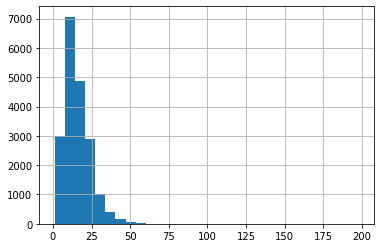

In [ ]:
seq_len = [len(i.split()) for i in train_texts]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_length = 256
## tokenize 
train_encodings = tokenizer.batch_encode_plus(train_texts, truncation=True, padding=True,max_length=max_length)
val_encodings = tokenizer.batch_encode_plus(val_texts, truncation=True,  padding=True,max_length=max_length)
test_encodings = tokenizer.batch_encode_plus(test_texts, truncation=True,  padding=True,max_length=max_length)

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = Dataset(train_encodings, train_labels)
val_dataset = Dataset(val_encodings, val_labels)
test_dataset = Dataset(test_encodings, test_labels)

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, n = precision_recall_fscore_support(labels, preds, average=None)
    cf = confusion_matrix(labels,preds)
    cf_n = cf.astype('float') / cf.sum(axis=1)[:, np.newaxis]
    acc=cf_n.diagonal() ## accuracy for each class
    return {
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'n': n,
        'cf': cf,
        'acc': acc
    }

In [ ]:
## Fine tuning 
training_args = TrainingArguments(  
    # output directory
    output_dir=os.path.join("Hung's paper", "results", "Deu9418"),
    # total number of training epochs
    num_train_epochs= 16,
    # batch size per device during training
    per_device_train_batch_size=32,
    # batch size for evaluation
    per_device_eval_batch_size=32,
    # number of warmup steps for learning rate scheduler
    warmup_steps=500,
    weight_decay = 0.01,
    # learning rate
    learning_rate = 2e-5,  
    # directory for storing logs
    logging_dir=os.path.join("Hung's paper", "logs", "Deu9418"),            
    logging_steps= 1000,    
    load_best_model_at_end=True,
    save_strategy = "no"
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=val_dataset, 
)

In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 19469
  Num Epochs = 16
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 9744


Step,Training Loss
1000,1.507500
2000,0.669700
3000,0.372100
4000,0.184300
5000,0.101900
6000,0.057000
7000,0.032300
8000,0.021100
9000,0.015700




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=9744, training_loss=0.3049432345603291, metrics={'train_runtime': 12566.709, 'train_samples_per_second': 24.788, 'train_steps_per_second': 0.775, 'total_flos': 4.098559224754176e+16, 'train_loss': 0.3049432345603291, 'epoch': 16.0})

In [ ]:
eval_res = trainer.evaluate()

***** Running Evaluation *****
  Num examples = 12980
  Batch size = 32


Trainer is attempting to log a value of "[0.77152318 0.75166297 0.84367246 0.75332349 0.78359417 0.84491384
 0.75020886 0.82105263 0.81195517 0.81875    0.73212748 0.77014218
 0.78941035 0.7107943  0.76689189 0.66025641 0.69822485]" of type <class 'numpy.ndarray'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[0.76644737 0.75       0.83743842 0.73699422 0.76180483 0.84538376
 0.7520938  0.82026769 0.83163265 0.81198347 0.75757576 0.77565632
 0.79418886 0.71958763 0.77739726 0.63580247 0.74683544]" of type <class 'numpy.ndarray'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[0.77666667 0.75333333 0.85       0.77039275 0.80666667 0.84444444
 0.74833333 0.82183908 0.79318735 0.82563025 0.70833333 0.76470588
 0.784689   0.70221328 0.75666667 

In [ ]:
evaluated = pd.DataFrame()
evaluated["f1"] = eval_res["eval_f1"]
evaluated["precision"] = eval_res["eval_precision"]
evaluated["recall"] = eval_res["eval_recall"]
evaluated["n"] = eval_res["eval_n"]
evaluated["accuracy"] = eval_res["eval_acc"]
list_index = evaluated.index.tolist()
evaluated['pred_topics'] = list_index
evaluated['topic'] = lab_to_top(evaluated)

In [ ]:
evaluated = evaluated.sort_values(by="f1", ascending=False)
evaluated

,f1,precision,recall,n,accuracy,pred_topics,topic
5,0.844914,0.845384,0.844444,900,0.844444,5,Education
2,0.843672,0.837438,0.850000,600,0.850000,2,Health
7,0.821053,0.820268,0.821839,522,0.821839,7,Energy
9,0.818750,0.811983,0.825630,476,0.825630,9,Transportation
8,0.811955,0.831633,0.793187,411,0.793187,8,Immigration
12,0.789410,0.794189,0.784689,418,0.784689,12,Defense
4,0.783594,0.761805,0.806667,1800,0.806667,4,Labor and Social Welfare
0,0.771523,0.766447,0.776667,2100,0.776667,0,Economics
11,0.770142,0.775656,0.764706,425,0.764706,11,Housing
14,0.766892,0.777397,0.756667,900,0.756667,14,International Affairs


In [ ]:
evaluated.to_csv("classification_res.csv")

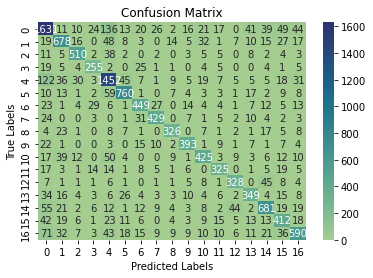

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cf = eval_res['eval_cf']
ax= plt.subplot()
sns_1 = sns.heatmap(cf, annot=True, ax = ax, fmt="d", cmap="crest")
ax.set_title('Confusion Matrix')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')


figure_1 = sns_1.get_figure()    



In [ ]:
figure_1.savefig('Figure 1.png')

In [ ]:
model_path = os.path.join("Hung's paper", "results", "final")

In [ ]:
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Configuration saved in Hung's paper/results/final/config.json
Model weights saved in Hung's paper/results/final/pytorch_model.bin
tokenizer config file saved in Hung's paper/results/final/tokenizer_config.json
Special tokens file saved in Hung's paper/results/final/special_tokens_map.json


("Hung's paper/results/final/tokenizer_config.json",
 "Hung's paper/results/final/special_tokens_map.json",
 "Hung's paper/results/final/vocab.txt",
 "Hung's paper/results/final/added_tokens.json",
 "Hung's paper/results/final/tokenizer.json")

# Classification with short sentences removed!

In [9]:
cap_deu_9418.groupby('cap_topic_new').size().nlargest(17)

cap_topic_new
0     8598
4     7660
16    4883
14    4308
1     3664
5     3065
10    2893
15    2443
6     2298
2     2228
7     1739
13    1657
9     1587
11    1416
12    1395
8     1369
3     1103
dtype: int64

In [10]:
cap_deu_9418.loc[:, 'length'] = cap_deu_9418.sentence_text.str.split().str.len()
cap_deu_9418_long = cap_deu_9418[cap_deu_9418.length.between(10,256)] 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [11]:
cap_deu_9418.head(5)

,Unnamed: 0,election_year,party_name,party_id,manifesto_id,sentence_id,cap_topic,cap_subtopic,header,junk,eu_dummy,sentence_text,cap_topic_new,length
21758,21759,1994,SPD,1,19941,1,99,99,1,0,0,Reformen für Deutschland.,16,3
21759,21760,1994,SPD,1,19941,2,99,99,1,0,0,Das Regierungsprogramm der SPD,16,4
21760,21761,1994,SPD,1,19941,3,99,99,0,1,0,Im Vergleich zur gedruckten Version fehlt noch...,16,11
21761,21762,1994,SPD,1,19941,4,99,99,0,1,0,Wird nachgereicht.,16,2
21762,21763,1994,SPD,1,19941,5,99,99,0,1,0,Hervorhebungen sind in der gedruckten Version ...,16,11


In [12]:
print(len(cap_deu_9418)-len(cap_deu_9418_long))

13627


In [13]:
cap_deu_9418_long.groupby('cap_topic_new').size().nlargest(17) ## needs a new subsampling scheme

cap_topic_new
0     6577
4     5925
14    3487
1     2874
5     2388
10    2111
15    1879
16    1879
6     1778
2     1759
7     1410
13    1291
9     1229
11    1101
12    1090
8     1041
3      860
dtype: int64

In [14]:
cap_deu_9418_econsoc = cap_deu_9418_long[cap_deu_9418_long.cap_topic_new.isin([0,4])] ## Economics + Labour and Social Welfare
cap_deu_9418_3000_long = cap_deu_9418_long[cap_deu_9418_long.cap_topic_new.isin([1,14])] # 2800+ to 3000+
cap_deu_9418_u2500_long = cap_deu_9418_long[cap_deu_9418_long.cap_topic_new.isin([3,5,8,10,12,11,9,13,7,2,6,16,15])] # under 2500

In [15]:
cap_deu_9418_econsoc = cap_deu_9418_econsoc.groupby('cap_topic_new', as_index = False,group_keys=False).apply(lambda s: s.sample(5500,replace=True, random_state = 1234))
cap_deu_9418_3000_long = cap_deu_9418_3000_long.groupby('cap_topic_new', as_index = False,group_keys=False).apply(lambda s: s.sample(2800,replace=True, random_state = 1234))

In [16]:
frames_long = [cap_deu_9418_econsoc, cap_deu_9418_3000_long, cap_deu_9418_u2500_long]
df_long = pd.concat(frames_long)
df_long.groupby('cap_topic_new').count()

,Unnamed: 0,election_year,party_name,party_id,manifesto_id,sentence_id,cap_topic,cap_subtopic,header,junk,eu_dummy,sentence_text,length
cap_topic_new,,,,,,,,,,,,,
0,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500
1,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
2,1759,1759,1759,1759,1759,1759,1759,1759,1759,1759,1759,1759,1759
3,860,860,860,860,860,860,860,860,860,860,860,860,860
4,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500,5500
5,2388,2388,2388,2388,2388,2388,2388,2388,2388,2388,2388,2388,2388
6,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778,1778
7,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410
8,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041


In [17]:
len(df_long)

36416

In [18]:
## export labels to a list
labels = df_long['cap_topic_new'].tolist()
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [19]:
texts = df_long['sentence_text'].tolist()

In [20]:
min_length = min(len(sentence.split()) for sentence in texts)
max_length = max(len(sentence.split()) for sentence in texts)

print('Min length (word) is: {}'.format(min_length))
print('Min length (word) is: {}'.format(max_length))


Min length (word) is: 10
Min length (word) is: 198


In [21]:
## train test split
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size = 0.25, random_state = 1234, stratify = labels)
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=0.4, random_state=4321, stratify=train_labels)

In [22]:
## Load tokenizer and models
bert_version = 'deepset/gbert-base'
model = BertForSequenceClassification.from_pretrained(bert_version, num_labels = 17)
tokenizer = BertTokenizerFast.from_pretrained(bert_version)
model = model.to(device)

Downloading:   0%|          | 0.00/362 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

Some weights of the model checkpoint at deepset/gbert-base were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint a

Downloading:   0%|          | 0.00/83.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/234k [00:00<?, ?B/s]

In [23]:
## tokenize 
train_encodings = tokenizer.batch_encode_plus(train_texts, truncation=True, padding=True)
val_encodings = tokenizer.batch_encode_plus(val_texts, truncation=True,  padding=True)
test_encodings = tokenizer.batch_encode_plus(test_texts, truncation=True,  padding=True)

In [24]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = Dataset(train_encodings, train_labels)
val_dataset = Dataset(val_encodings, val_labels)
test_dataset = Dataset(test_encodings, test_labels)

In [25]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, n = precision_recall_fscore_support(labels, preds, average=None)
    cf = confusion_matrix(labels,preds)
    cf_n = cf.astype('float') / cf.sum(axis=1)[:, np.newaxis]
    acc=cf_n.diagonal() ## accuracy for each class
    return {
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'n': n,
        'cf': cf,
        'acc': acc
    }

In [26]:
## Fine tuning 
training_args = TrainingArguments(  
    # output directory
    output_dir=os.path.join("Hung's paper", "results", "Deu9418_Long"),
    # total number of training epochs
    num_train_epochs= 16,
    # batch size per device during training
    per_device_train_batch_size=16,
    # batch size for evaluation
    per_device_eval_batch_size=16,
    # number of warmup steps for learning rate scheduler
    warmup_steps=500,
    weight_decay = 0.01,
    # learning rate
    learning_rate = 2e-5,  
    # directory for storing logs
    logging_dir=os.path.join("Hung's paper", "logs", "Deu9418_Long"),            
    logging_steps= 1000,    
    load_best_model_at_end=True,
    save_strategy = "no"
)

In [27]:
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=val_dataset, 
)

In [28]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 16387
  Num Epochs = 16
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 16400


Step,Training Loss
1000,1.590400
2000,0.819500
3000,0.553800
4000,0.359000
5000,0.225300
6000,0.138100
7000,0.092600
8000,0.053800
9000,0.040600
10000,0.024800




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=16400, training_loss=0.24127181737161263, metrics={'train_runtime': 4739.2933, 'train_samples_per_second': 55.323, 'train_steps_per_second': 3.46, 'total_flos': 2.263895311676544e+16, 'train_loss': 0.24127181737161263, 'epoch': 16.0})

In [29]:
eval_res = trainer.evaluate()

***** Running Evaluation *****
  Num examples = 10925
  Batch size = 16


Trainer is attempting to log a value of "[0.75263775 0.74574281 0.80648236 0.71698113 0.78976772 0.80631868
 0.70348837 0.80139373 0.74757282 0.80484522 0.66836302 0.72136223
 0.78915663 0.66755674 0.78039927 0.59649123 0.57790927]" of type <class 'numpy.ndarray'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[0.72871737 0.73580533 0.81190019 0.69852941 0.76699029 0.79431664
 0.72745491 0.78767123 0.75490196 0.79946524 0.72161172 0.73734177
 0.77744807 0.69060773 0.79335793 0.59027778 0.65111111]" of type <class 'numpy.ndarray'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[0.77818182 0.75595238 0.80113636 0.73643411 0.81393939 0.81868898
 0.68105066 0.81560284 0.74038462 0.8102981  0.62243286 0.70606061
 0.80122324 0.64599483 0.76785714 

In [31]:
evaluated = pd.DataFrame()
evaluated["f1"] = eval_res["eval_f1"]
evaluated["precision"] = eval_res["eval_precision"]
evaluated["recall"] = eval_res["eval_recall"]
evaluated["n"] = eval_res["eval_n"]
evaluated["accuracy"] = eval_res["eval_acc"]
list_index = evaluated.index.tolist()
evaluated['pred_topics'] = list_index
evaluated['topic'] = lab_to_top(evaluated)

In [32]:
evaluated = evaluated.sort_values(by="f1", ascending=False)
evaluated

,f1,precision,recall,n,accuracy,pred_topics,topic
2,0.806482,0.811900,0.801136,528,0.801136,2,Health
5,0.806319,0.794317,0.818689,717,0.818689,5,Education
9,0.804845,0.799465,0.810298,369,0.810298,9,Transportation
7,0.801394,0.787671,0.815603,423,0.815603,7,Energy
4,0.789768,0.766990,0.813939,1650,0.813939,4,Labor and Social Welfare
12,0.789157,0.777448,0.801223,327,0.801223,12,Defense
14,0.780399,0.793358,0.767857,840,0.767857,14,International Affairs
0,0.752638,0.728717,0.778182,1650,0.778182,0,Economics
8,0.747573,0.754902,0.740385,312,0.740385,8,Immigration
1,0.745743,0.735805,0.755952,840,0.755952,1,Civil Rights


In [33]:
evaluated.to_csv("classification_res_trimmed.csv")

In [ ]:
model_path = os.path.join("Hung's paper", "results", "trimmed")
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Configuration saved in Hung's paper/results/trimmed/config.json
Model weights saved in Hung's paper/results/trimmed/pytorch_model.bin
tokenizer config file saved in Hung's paper/results/trimmed/tokenizer_config.json
Special tokens file saved in Hung's paper/results/trimmed/special_tokens_map.json


("Hung's paper/results/trimmed/tokenizer_config.json",
 "Hung's paper/results/trimmed/special_tokens_map.json",
 "Hung's paper/results/trimmed/vocab.txt",
 "Hung's paper/results/trimmed/added_tokens.json",
 "Hung's paper/results/trimmed/tokenizer.json")

# Predictions


In [ ]:
## Load pre-trained models
model_path = os.path.join("Hung's paper", "results", "final")
model = BertForSequenceClassification.from_pretrained(model_path).to(device)
tokenizer = BertTokenizerFast.from_pretrained(model_path)

In [ ]:
germaparl = pd.read_csv(os.path.join("Hung's paper", "germaparl.csv"), encoding='utf-8')
germaparl = germaparl.dropna(subset=['text'])


In [ ]:
germaparl.head(5)

,speaker,role,party,position,text,session,date,bundestag,year
0,GünterRexrodt,government,FDP,Bundesminister für Wirtschaft,Frau Präsidentin! Meine Damen und Herren! Gemä...,86,1996-02-08,13,1996.0
1,GünterRexrodt,government,FDP,Bundesminister für Wirtschaft,Die Lage am Arbeitsmarkt erfordert ungewöhnlic...,86,1996-02-08,13,1996.0
2,GünterRexrodt,government,FDP,Bundesminister für Wirtschaft,Die Kernbotschaften dabei sind:,86,1996-02-08,13,1996.0
3,GünterRexrodt,government,FDP,Bundesminister für Wirtschaft,Erstens. Wir werden zwar die derzeitige Wachst...,86,1996-02-08,13,1996.0
4,GünterRexrodt,government,FDP,Bundesminister für Wirtschaft,"Aber, zweitens, Wachstum allein wird für einen...",86,1996-02-08,13,1996.0


In [ ]:
pred_texts = germaparl['text'].tolist()
len(pred_texts)

1441980

In [ ]:
from statistics import stdev, mean
## Before
seq_len = [len(i.split()) for i in pred_texts]
seq_len_mean = mean(seq_len)
seq_len_std = stdev(seq_len)
seq_len_max = max(seq_len)
seq_len_min = min(seq_len)
print('Mean length (word) is: {}'.format(seq_len_mean))
print('Std length (word) is: {}'.format(seq_len_std))
print('Min length (word) is: {}'.format(seq_len_min))
print('Max length (word) is: {}'.format(seq_len_max))


Mean length (word) is: 48.56293984659981
Std length (word) is: 33.68944507721186
Min length (word) is: 1
Max length (word) is: 1692


Very skewed distribution


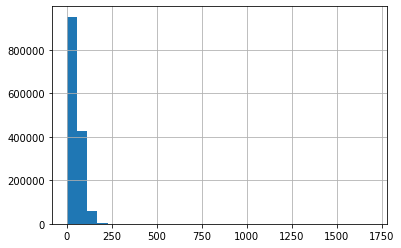

In [ ]:
pd.Series(seq_len).hist(bins = 30)

In [ ]:
## This piece of code takes a lot of RAM. If you can't access high-ram session, consider doing this in R or using iterrows instead (much slower).
germaparl.loc[:, 'length'] = germaparl.text.str.split().str.len()


In [ ]:
germaparl = germaparl[germaparl.length.between(10,256)]


In [ ]:
pred_texts = germaparl['text'].tolist()
len(pred_texts)

1320329

In [ ]:
germaparl.head(5)

,speaker,role,party,position,text,session,date,bundestag,year,length
0,GünterRexrodt,government,FDP,Bundesminister für Wirtschaft,Frau Präsidentin! Meine Damen und Herren! Gemä...,86,1996-02-08,13,1996.0,68
1,GünterRexrodt,government,FDP,Bundesminister für Wirtschaft,Die Lage am Arbeitsmarkt erfordert ungewöhnlic...,86,1996-02-08,13,1996.0,34
3,GünterRexrodt,government,FDP,Bundesminister für Wirtschaft,Erstens. Wir werden zwar die derzeitige Wachst...,86,1996-02-08,13,1996.0,21
4,GünterRexrodt,government,FDP,Bundesminister für Wirtschaft,"Aber, zweitens, Wachstum allein wird für einen...",86,1996-02-08,13,1996.0,16
5,GünterRexrodt,government,FDP,Bundesminister für Wirtschaft,Wir brauchen Vorrang für Beschäftigung im poli...,86,1996-02-08,13,1996.0,50


In [ ]:
## After
seq_len = [len(i.split()) for i in pred_texts]
seq_len_mean = mean(seq_len)
seq_len_std = stdev(seq_len)
seq_len_max = max(seq_len)
seq_len_min = min(seq_len)
print('Mean length (word) is: {}'.format(seq_len_mean))
print('Std length (word) is: {}'.format(seq_len_std))
print('Min length (word) is: {}'.format(seq_len_min))
print('Max length (word) is: {}'.format(seq_len_max))

Mean length (word) is: 52.49613997723295
Std length (word) is: 31.815316283276903
Min length (word) is: 10
Max length (word) is: 256


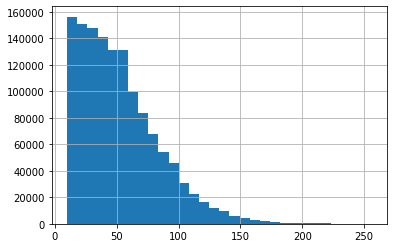

In [ ]:
pd.Series(seq_len).hist(bins = 30)

In [ ]:
def get_prediction(text):
  res = []
  with torch.no_grad():
    for x in text:
      inputs = tokenizer(x, padding=True, truncation=True, return_tensors="pt").to(device)
      # perform inference to our model
      outputs = model(**inputs)
      # get output probabilities by doing softmax
      probs = outputs[0].softmax(1)
      argmax = probs.argmax()
      res.append(argmax)
  return res

In [ ]:
text_test = pred_texts[0:10]
res = get_prediction(text_test)
print(res)


Predicted 1 labels
[tensor(0, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0'), tensor(4, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0'), tensor(0, device='cuda:0')]


In [ ]:
pred_texts[4]

'Wir brauchen Vorrang für Beschäftigung im politischen Handeln, auch in Bereichen, an die wir uns bisher nicht herangewagt haben. Wir brauchen Vorrang für Beschäftigung beim Verhalten der Tarifpartner und der gesellschaftlichen Gruppen, Vorrang für Beschäftigung als Leitlinie einer gemeinsamen Strategie, die wir im Bündnis für Arbeit und Zukunftssicherung umsetzen wollen.'

In [ ]:
def chunkIt(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0
    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out
pred_texts_chunk = chunkIt(pred_texts, 1000)
len(pred_texts_chunk[0])

1320

In [ ]:
len(pred_texts_chunk[1])

1321

In [ ]:
def iter_pred(obj, pre, post):
  preds_final = []
  for i in range(pre,post):
    if i % 10 == 0:
      print(f'Starting the {i+1}th chunk.')
    pred = get_prediction(obj[i])
    preds_final.append(pred)
  return preds_final


In [ ]:
def concat(obj):
    pred_topics_con = []
    pred_topics_final = []
    for i in obj:
        pred_topics_con += i
    for i in pred_topics_con:
        pred_topics_final.append(float(i))
    return pred_topics_final




In [30]:
def lab_to_top(df):
  topic = []
  for value in df['pred_topics']:
    if value == 0:
      topic.append("Economics")
    elif value == 1:
      topic.append("Civil Rights")
    elif value == 2:
      topic.append("Health")
    elif value == 3:
      topic.append("Agriculture")
    elif value == 4:
      topic.append("Labor and Social Welfare")
    elif value == 5:
      topic.append("Education")
    elif value == 6:
      topic.append("Environment")
    elif value == 7:
      topic.append("Energy")
    elif value == 8:
      topic.append("Immigration")
    elif value == 9:
      topic.append("Transportation")
    elif value == 10:
      topic.append("Law and Crime")
    elif value == 11:
      topic.append("Housing")
    elif value == 12:
      topic.append("Defense")
    elif value == 13:
      topic.append("Technology")
    elif value == 14:
      topic.append("International Affairs")
    elif value == 15:
      topic.append("Government Operations")
    else:
      topic.append("Other")
  return(topic)


  

In [ ]:
pred_topics_1 = iter_pred(pred_texts_chunk, 0, 500)
pred_topics_concat_1 = concat(pred_topics_1)

Starting the 1th chunk.
Starting the 11th chunk.
Starting the 21th chunk.
Starting the 31th chunk.
Starting the 41th chunk.
Starting the 51th chunk.
Starting the 61th chunk.
Starting the 71th chunk.
Starting the 81th chunk.
Starting the 91th chunk.
Starting the 101th chunk.
Starting the 111th chunk.
Starting the 121th chunk.
Starting the 131th chunk.
Starting the 141th chunk.
Starting the 151th chunk.
Starting the 161th chunk.
Starting the 171th chunk.
Starting the 181th chunk.
Starting the 191th chunk.
Starting the 201th chunk.
Starting the 211th chunk.
Starting the 221th chunk.
Starting the 231th chunk.
Starting the 241th chunk.
Starting the 251th chunk.
Starting the 261th chunk.
Starting the 271th chunk.
Starting the 281th chunk.
Starting the 291th chunk.
Starting the 301th chunk.
Starting the 311th chunk.
Starting the 321th chunk.
Starting the 331th chunk.
Starting the 341th chunk.
Starting the 351th chunk.
Starting the 361th chunk.
Starting the 371th chunk.
Starting the 381th chun

In [ ]:
len(pred_topics_concat_1)

660288

In [ ]:
germaparl_1 = germaparl[:len(pred_topics_concat_1)]

In [ ]:
germaparl_1['pred_topics'] = pred_topics_concat_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
germaparl_1.head()

,Unnamed: 0,X1,X2,X3,X4,X5,speaker,role,party,position,text,session,length,pred_topics
0,1,Günter Rexrodt,government,FDP,Bundesminister für Wirtschaft,Frau Präsidentin! Meine Damen und Herren! Gemä...,GünterRexrodt,government,FDP,Bundesminister für Wirtschaft,Frau Präsidentin! Meine Damen und Herren! Gemä...,1,68,0.0
1,2,Günter Rexrodt,government,FDP,Bundesminister für Wirtschaft,Die Lage am Arbeitsmarkt erfordert ungewöhnlic...,GünterRexrodt,government,FDP,Bundesminister für Wirtschaft,Die Lage am Arbeitsmarkt erfordert ungewöhnlic...,1,34,4.0
3,4,Günter Rexrodt,government,FDP,Bundesminister für Wirtschaft,Erstens. Wir werden zwar die derzeitige Wachst...,GünterRexrodt,government,FDP,Bundesminister für Wirtschaft,Erstens. Wir werden zwar die derzeitige Wachst...,1,21,0.0
4,5,Günter Rexrodt,government,FDP,Bundesminister für Wirtschaft,"Aber, zweitens, Wachstum allein wird für einen...",GünterRexrodt,government,FDP,Bundesminister für Wirtschaft,"Aber, zweitens, Wachstum allein wird für einen...",1,16,0.0
5,6,Günter Rexrodt,government,FDP,Bundesminister für Wirtschaft,Wir brauchen Vorrang für Beschäftigung im poli...,GünterRexrodt,government,FDP,Bundesminister für Wirtschaft,Wir brauchen Vorrang für Beschäftigung im poli...,1,50,4.0


In [ ]:
germaparl_1['topic_name'] = lab_to_top(germaparl_1)
germaparl_1.groupby('topic_name').count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,speaker,role,party,position,text,session,date,bundestag,year,length,pred_topics
topic_name,,,,,,,,,,,
Agriculture,16015,16017,16015,2871,16017,16017,16017,16017,15902,16017,16017
Civil Rights,26195,26207,26187,3494,26207,26207,26207,26207,26171,26207,26207
Defense,31515,31830,31508,6389,31830,31830,31830,31830,31628,31830,31830
Economics,134121,134125,134111,24243,134125,134125,134125,134125,133632,134125,134125
Education,21219,21220,21211,4714,21220,21220,21220,21220,21172,21220,21220
Energy,19723,19723,19723,3413,19723,19723,19723,19723,19704,19723,19723
Environment,19142,19142,19142,3136,19142,19142,19142,19142,19127,19142,19142
Government Operations,56621,56641,56612,8762,56641,56641,56641,56641,56538,56641,56641
Health,29525,29530,29524,4991,29530,29530,29530,29530,29498,29530,29530


In [ ]:
germaparl_1.to_csv('germaparl_pred_1.csv', encoding='utf-8')

In [ ]:
pred_topics_2 = iter_pred(pred_texts_chunk, 500, 1000)


Starting the 501th chunk.
Starting the 511th chunk.
Starting the 521th chunk.
Starting the 531th chunk.
Starting the 541th chunk.
Starting the 551th chunk.
Starting the 561th chunk.
Starting the 571th chunk.
Starting the 581th chunk.
Starting the 591th chunk.
Starting the 601th chunk.
Starting the 611th chunk.
Starting the 621th chunk.
Starting the 631th chunk.
Starting the 641th chunk.
Starting the 651th chunk.
Starting the 661th chunk.
Starting the 671th chunk.
Starting the 681th chunk.
Starting the 691th chunk.
Starting the 701th chunk.
Starting the 711th chunk.
Starting the 721th chunk.
Starting the 731th chunk.
Starting the 741th chunk.
Starting the 751th chunk.
Starting the 761th chunk.
Starting the 771th chunk.
Starting the 781th chunk.
Starting the 791th chunk.
Starting the 801th chunk.
Starting the 811th chunk.
Starting the 821th chunk.
Starting the 831th chunk.
Starting the 841th chunk.
Starting the 851th chunk.
Starting the 861th chunk.
Starting the 871th chunk.
Starting the

In [ ]:
pred_topics_concat_2 = concat(pred_topics_2)

In [ ]:
len(germaparl)-len(pred_topics_concat_2)

660168

In [ ]:
len(pred_topics_concat_2)

660289

In [ ]:
germaparl_2 = germaparl[len(germaparl)-len(pred_topics_concat_2):]
germaparl_2['pred_topics'] = pred_topics_concat_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
germaparl_2['topic_name'] = lab_to_top(germaparl_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
germaparl_2.to_csv('germaparl_pred_2.csv', encoding='utf-8')

In [ ]:
germaparl_1 = pd.read_csv("germaparl_pred_1.csv", encoding = "utf-8")

In [ ]:
germaparl_2 = pd.read_csv("germaparl_pred_2.csv", encoding = "utf-8")

In [ ]:
frames = [germaparl_1, germaparl_2]
final_df = pd.concat(frames)

In [ ]:
print(len(germaparl_1))
print(len(germaparl_2))
print(len(germaparl_1)+len(germaparl_2))
print(len(germaparl)-len(pred_topics_concat_2))
print(len(final_df))
print(len(germaparl))

660288
660289
1320577
660288
1320577
1320577


In [ ]:
final_df.groupby('topic_name').count()

,Unnamed: 0,speaker,role,party,position,text,session,date,bundestag,year,length,pred_topics
topic_name,,,,,,,,,,,,
Agriculture,29832,29830,29832,29830,4236,29832,29832,29832,29832,29717,29832,29832
Civil Rights,63148,63133,63148,63114,6419,63148,63148,63148,63148,63112,63148,63148
Defense,64787,64255,64787,64247,11016,64787,64787,64787,64787,64585,64787,64787
Economics,249035,249026,249035,248979,37622,249035,249035,249035,249035,248542,249035,249035
Education,44154,44153,44154,44138,7781,44154,44154,44154,44154,44106,44154,44154
Energy,50294,50294,50294,50284,7368,50294,50294,50294,50294,50275,50294,50294
Environment,37728,37727,37728,37701,5597,37728,37728,37728,37728,37713,37728,37728
Government Operations,102149,102103,102149,102075,13406,102149,102149,102149,102149,102046,102149,102149
Health,61012,61000,61012,60995,8540,61012,61012,61012,61012,60980,61012,61012


In [ ]:
final_df = final_df[["speaker", "role", "party", "position", "session", "date","bundestag", "year" ,"pred_topics", "topic_name", "length","text"]]

In [ ]:
final_df.to_csv('germaparl_pred.csv', encoding='utf-8')

# Similarity scores


In [ ]:
df = pd.read_csv("parlspeech_pred.csv", encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
## Sample 50 cases from each category for manual checking
df_sample = df.groupby('topic_name').sample(n=100, random_state=1234)

In [ ]:
df_sample.head(5)

,Unnamed: 0,Unnamed: 0.1,doc_id,text,date,agenda,speechnumber,speaker,party,party.facts.id,chair,terms,parliament,iso3country,length,pred_topics,topic_name
898731,1612962,1612963,2440611.520,Dies alles ergäbe wieder Perspektiven für den ...,2000-06-29,NaN,175,Albert Deß,CDU/CSU,211.0,False,1544,DE-Bundestag,DEU,17,3.0,Agriculture
1003337,1803201,1803202,382142.170,"Die Agrarberichte der letzten Jahre zeigen , d...",2001-06-21,NaN,47,Josef Miller,CDU/CSU,211.0,False,630,DE-Bundestag,DEU,18,3.0,Agriculture
1099661,1981701,1981702,498392.108,Dazu gehören die rückhaltlose Aufklärung ohne ...,2002-06-06,NaN,2,Renate Künast,GRUENE,1816.0,False,4961,DE-Bundestag,DEU,24,3.0,Agriculture
2550539,4898641,4898642,106608.120,Auch in der Europäischen Union und in Deutschl...,2016-11-10,Tagesordnungspunkt 8: Erste Beratung des von d...,120,Christian Schmidt,CDU/CSU,211.0,False,959,DE-Bundestag,DEU,40,3.0,Agriculture
1615835,2951353,2951354,223053.630,"Die Grüne Gentechnik ist eine Chance , die wir...",2008-01-25,NaN,82,Peter Bleser,CDU/CSU,211.0,False,1161,DE-Bundestag,DEU,25,3.0,Agriculture


In [ ]:
df_sample = df_sample[['text', 'topic_name']]
df_sample.to_csv("parlspeech_sampled.csv", encoding='latin-1')

In [ ]:
min(df['date'])

'1991-03-12'

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [ ]:
def date_to_cabinet(df):
  cab = []
  for date in df['date']:
    if '1991-03-12' <= date <= '1994-11-10':
      cab.append(12)
    elif '1994-11-10' < date <= '1998-10-26':
      cab.append(13)
    elif '1998-10-26' < date <= '2002-10-17':
      cab.append(14)
    elif '2002-10-17' < date <= '2005-10-18':
      cab.append(15)
    elif '2005-10-18' < date <= '2009-09-27':
      cab.append(16)
    elif '2009-09-27' < date <= '2013-10-22':
      cab.append(17)
    elif '2013-10-22' < date <= '2017-10-24':
      cab.append(18)
    else:
      cab.append(99)
  return cab 



In [ ]:
df['cabinet'] = date_to_cabinet(df)

In [ ]:
set(df['cabinet'])

{12, 13, 14, 15, 16, 17, 18}

In [ ]:
df.groupby(['topic_name','year']).size().nlargest(432)

topic_name   year
Economics    2010    21515
             2012    20536
             1999    20047
             2006    19494
Other        1999    19209
                     ...  
Technology   1992     1726
Agriculture  1994     1721
Housing      2010     1719
Agriculture  1997     1713
Energy       1994     1681
Length: 432, dtype: int64

In [ ]:
df = df[~df.party.isin(['independent', 'AfD'])]
df = df[~df.topic_name.isin(['Other'])]
df = df[~df.cabinet.isin([99])]
df = df.dropna(subset=['topic_name','party','cabinet'])

In [ ]:
df['cabinet_str'] = df['cabinet'].astype(str)
df['year_str'] = df['year'].astype(str)

In [ ]:
df['combi'] = df['topic_name'].str.cat(others=[df.party,df.year_str, df.speaker], sep='-')

In [ ]:
import torch.nn.functional as f 
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sentence_transformers import SentenceTransformer, util
from sklearn.manifold import MDS

In [ ]:
## Load tokenizer and models
bert_version = 'deepset/gbert-base'
from sentence_transformers import SentenceTransformer, LoggingHandler
from sentence_transformers import models, util, datasets, evaluation, losses
from torch.utils.data import DataLoader
word_embedding_model = models.Transformer(bert_version)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(), 'cls')
model = SentenceTransformer(modules=[word_embedding_model, pooling_model]).to(device)
import nltk
nltk.download('punkt')

Downloading:   0%|          | 0.00/362 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

Some weights of the model checkpoint at deepset/gbert-base were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/83.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/234k [00:00<?, ?B/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['ty'] = df['topic_name'].str.cat(others=[df.year_str], sep='-')
len(set(df['ty']))

432

In [ ]:
df_train = df.groupby('ty').sample(674, random_state = 1234)
len(df_train)

291168

In [ ]:
train_text = df_train['text'].tolist()

In [ ]:
train_dataset = datasets.DenoisingAutoEncoderDataset(train_text)

# DataLoader to batch your data
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Use the denoising auto-encoder loss
train_loss = losses.DenoisingAutoEncoderLoss(model, decoder_name_or_path=bert_version, tie_encoder_decoder=True)

When tie_encoder_decoder=True, the decoder_name_or_path will be invalid.
Some weights of the model checkpoint at deepset/gbert-base were not used when initializing BertLMHeadModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertLMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertLMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertLMHeadModel were not initialized from the model checkpoint at deepset/gbert-base and are newly initialized: ['bert.encoder.layer.4.crossattention.output.dense.weight', 'bert.encoder.layer.3.crossattention.self.key.weight', 'bert.encoder.layer.11.crossattention.self.value.w

In [ ]:
model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=2,
    weight_decay=0,
    scheduler='constantlr',
    optimizer_params={'lr': 3e-5},
    show_progress_bar=True
)


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Iteration:   0%|          | 0/36396 [00:00<?, ?it/s]

Iteration:   0%|          | 0/36396 [00:00<?, ?it/s]

In [ ]:
model.save(os.path.join("Hung's paper", "results", "TSDAE", "parlspeech"))

In [ ]:
model = SentenceTransformer(os.path.join("Hung's paper", "results", "TSDAE", "parlspeech"), device = "cuda")

In [ ]:
len(df)

2179853

In [ ]:
df_sample = df.groupby(['topic_name', 'party']).sample(10, random_state = 1234)
len(df_sample)

800

In [ ]:
def group_texts(df, block_size):
    df_concat = df.groupby(['topic_name', 'party','year'])['text'].apply(' '.join).reset_index()
    concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    # We drop the small remainder, we could add padding if the model supported it instead of this drop, you can
        # customize this part to your needs.
    total_length = (total_length // block_size) * block_size
    # Split by chunks of max_len.
    result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }
    result["labels"] = result["input_ids"].copy()
    return result

In [ ]:
len(df)

2179853

In [ ]:
def group_texts(df, block_size):
    df_concat = df.groupby(['topic_name', 'party','cabinet','speaker'])['text'].apply(' '.join).reset_index()
    res_list = []
    texts = df_concat['text'].tolist()
    party = df_concat['party'].tolist()
    speaker = df_concat['speaker'].tolist()
    topic = df_concat['topic_name'].tolist()
    cabinet = df_concat['cabinet'].tolist()
    for index, text in enumerate(texts):
      length_text = len(text.split())
      if length_text >= block_size:
        length_text = (length_text // block_size) * block_size
        num_times = len([i for i in range(0, length_text, block_size)])
        result = {
          'text': [text[i : i + block_size] for i in range(0, length_text, block_size)],
          'party': np.repeat(party[index],num_times).tolist(),
          'speaker': np.repeat(speaker[index],num_times).tolist(),
          'topic_name': np.repeat(topic[index],num_times).tolist(),
          'cabinet': np.repeat(cabinet[index],num_times).tolist(),
        }
        res_list.append(result)
      else:
        result = {
            'text': text,
            'party': party[index],
            'speaker': speaker[index],
            'topic_name': topic[index],
            'cabinet': cabinet[index],
        }
        res_list.append(result)
      
    return res_list

result = group_texts(df, 128)



In [ ]:
len(result)

{'cabinet': 12,
 'party': 'CDU/CSU',
 'speaker': 'Albert Probst',
 'text': 'Eine einfachere oder eine bessere Regelung ist allerdings einvernehmlich mit der Kommission nicht möglich gewesen .',
 'topic_name': 'Agriculture'}

In [ ]:
df_concat = pd.DataFrame()
for group in result:
  if isinstance(group['text'], list):
    df_temp = pd.DataFrame(group)
  else:
    df_temp = pd.DataFrame(group, index = [0])
  df_concat = df_concat.append(df_temp, ignore_index=True)

  

In [ ]:
df_concat.groupby(['topic_name','party','cabinet']).size().nsmallest()

topic_name             party      cabinet
Government Operations  FDP        18          1
Energy                 PDS/LINKE  15          7
Agriculture            PDS/LINKE  15          8
Environment            PDS/LINKE  15          8
Housing                PDS/LINKE  15         13
dtype: int64

In [ ]:
len(df_concat)

424552

In [ ]:
df_concat.head()

,text,party,speaker,topic_name,cabinet,cabinet_str,combi
0,"Bevor das nun genehmigt wird oder nicht , möch...",CDU/CSU,Adolf Roth,Agriculture,12,12,Agriculture-CDU/CSU-Adolf Roth-12
1,Als Landwirt kenne ich die Existenzangst eines...,CDU/CSU,Albert Deß,Agriculture,12,12,Agriculture-CDU/CSU-Albert Deß-12
2,ch das novellierte Tierschutzgesetz im großen ...,CDU/CSU,Albert Deß,Agriculture,12,12,Agriculture-CDU/CSU-Albert Deß-12
3,"Tierschutzgesetzes noch Lücken gibt , so sind...",CDU/CSU,Albert Deß,Agriculture,12,12,Agriculture-CDU/CSU-Albert Deß-12
4,"n zu schließen . . Es ist erfreulich , daß dor...",CDU/CSU,Albert Deß,Agriculture,12,12,Agriculture-CDU/CSU-Albert Deß-12


In [ ]:
df_concat['cabinet_str'] = df_concat['cabinet'].astype(str)
df_concat['combi'] = df_concat['topic_name'].str.cat(others=[df_concat.party,df_concat.speaker, df_concat.cabinet_str], sep='_')

In [ ]:
len(set(df_concat['combi']))

64035

In [ ]:
def iter_embed(df):
  embed = []
  combi_list = []
  for combi in set(df['combi']):
    df_temp = df[df.combi == combi]
    texts = df_temp['text'].tolist()
    embeddings = model.encode(texts, convert_to_tensor=True, batch_size=32)
    embed_mean = torch.mean(embeddings, dim=0)
    embed.append(embed_mean)
    combi_list.append(combi)
  return embed, combi_list

In [ ]:
embeddings, combinations = iter_embed(df_concat)


In [ ]:
import pickle
file_name = "embeddings_cabinet.pkl"
open_file = open(file_name, "wb")
pickle.dump(embeddings, open_file)
open_file.close()
import pickle
file_name = "combinations_cabinet.pkl"
open_file = open(file_name, "wb")
pickle.dump(combinations, open_file)
open_file.close()


In [ ]:
embeddings[0]

In [ ]:
import pickle
file_name = "embeddings_party.pkl"
open_file = open(file_name, "rb")
embeddings = pickle.load(open_file)
open_file.close()
file_name = "combinations_party.pkl"
open_file = open(file_name, "rb")
combinations = pickle.load(open_file)
open_file.close()

In [ ]:
df_1 = pd.DataFrame([embeddings]).T
df_2 = pd.DataFrame([combinations]).T
df_2 = df_2[0].str.split('_', 3, expand=True)
df_new = pd.concat([df_1, df_2], axis = 1)

In [ ]:
df_new.head(5)

,0,0,1,2,3
0,"[tensor(-0.1567, device='cuda:0'), tensor(-0.1...",Immigration,CDU/CSU,Norbert Barthle,16
1,"[tensor(-0.3070, device='cuda:0'), tensor(0.08...",Agriculture,SPD,Michael Roth,17
2,"[tensor(-0.2569, device='cuda:0'), tensor(-0.1...",Environment,PDS/LINKE,André Hahn,18
3,"[tensor(-0.0464, device='cuda:0'), tensor(-0.0...",Health,SPD,Jella Teuchner,15
4,"[tensor(-0.3841, device='cuda:0'), tensor(0.27...",Immigration,CDU/CSU,Gerd Müller,14


In [ ]:
df_new.columns = ['embed', 'topic_name', 'party', 'speaker', 'cabinet']
print(len(df_new))

64035


In [ ]:
df_new = df_new.sort_values(by=['topic_name', 'party', 'cabinet','speaker']).reset_index()

In [ ]:
df_new.head()

,index,embed,topic_name,party,speaker,cabinet
0,31180,"[tensor(-0.3436, device='cuda:0'), tensor(0.21...",Agriculture,CDU/CSU,Adolf Roth,12
1,34123,"[tensor(-0.0269, device='cuda:0'), tensor(-0.0...",Agriculture,CDU/CSU,Albert Deß,12
2,35070,"[tensor(-0.3459, device='cuda:0'), tensor(0.59...",Agriculture,CDU/CSU,Albert Probst,12
3,2973,"[tensor(-0.3516, device='cuda:0'), tensor(-0.3...",Agriculture,CDU/CSU,Alexander Warrikoff,12
4,48211,"[tensor(0.0299, device='cuda:0'), tensor(-0.19...",Agriculture,CDU/CSU,Alois Graf von Waldburg-Zeil,12


In [ ]:
set(df_new['cabinet'])

{'12', '13', '14', '15', '16', '17', '18'}

In [ ]:
class Scaling_MDS:
  def __init__(self, dataframe, scale_method='all'):
    self.df = dataframe
    self.method = scale_method
  def create_df(self, topic_to_scale=None, year_to_scale=None):
    if self.method == 'by_topic':
        self.topic = topic_to_scale
        df_temp = self.df[self.df.topic_name == self.topic]
    if self.method == 'by_year':
      if year_to_scale==None:
        raise ValueError('You need to input the year to scale')
      else:
        df_temp = self.df[(self.df.topic_name == topic_to_scale) & (self.df.year == yeart_to_scale)]
    if self.method not in ['all','by_topic', 'by_year']:
      raise ValueError('Unknown method!')
    return df_temp
  def scale_each(self, df_to_scale):
    embed = df_to_scale['embed'].tolist()
    list_party = df_to_scale['party'].tolist()
    list_topic = df_to_scale['topic_name'].tolist()
    list_year = df_to_scale['year'].tolist()
    list_cabinet = df_to_scale['cabinet'].tolist()
    if not type(embed[0]).__module__ == np.__name__:
      embed = np.array([t.cpu().detach().numpy() for t in embed])
    sim_matrix = euclidean_distances(embed, embed)
    mds = MDS(n_components=2, eps = 0.001, n_init=4, dissimilarity='precomputed', random_state=1234, verbose = 0, max_iter=300, metric = True)
    fit_transformed = mds.fit_transform(sim_matrix)
    score_x = fit_transformed[:,0]
    score_y = fit_transformed[:,1]
    dict_transformed = {'score_x': score_x,'score_y': score_y,'party': list_party, 'topic_name': list_topic, 'cabinet': list_cabinet, 'year': list_year}
    df_scaled = pd.DataFrame(data = dict_transformed)
    return df_scaled
  def scale_all(self):
    if self.method == 'all':
      df_list = []
      for topic in set(self.df.topic_name):
        df_temp = self.df[self.df.topic_name == topic]
        if len(df_temp) == 0:
          pass
        else:
          result = self.scale_each(df_temp)
          df_list.append(result)
      df_final = pd.concat(df_list)
      df_final = df_final.sort_values(by=['topic_name','year','party'], ascending=True).reset_index() 
      df_final = df_final[['topic_name', 'cabinet','year', 'party', 'score_x', 'score_y']]   
    return df_final


In [ ]:
class Scaling_Harmonic:
  def __init__(self, dataframe, scale_method='all'):
    self.df = dataframe
    self.method = scale_method
  def create_df(self, topic_to_scale=None, year_to_scale=None):
    self.df.year = pd.to_numeric(self.df.year, errors='coerce')
    if self.method == 'by_topic':
        self.topic = topic_to_scale
        df_temp = self.df[self.df.topic_name == self.topic]
    if self.method == 'by_year':
      if year_to_scale==None:
        raise ValueError('You need to input the year to scale')
      else:
        df_temp = self.df[(self.df.topic_name == topic_to_scale) & (self.df.year == year_to_scale)]
    if self.method not in ['all','by_topic', 'by_year']:
      raise ValueError('Unknown method!')
    return df_temp
  def scale_each(self, df_to_scale):
    embed = df_to_scale['embed'].tolist()
    list_party = df_to_scale['party'].tolist()
    list_topic = df_to_scale['topic_name'].tolist()
    list_year = df_to_scale['year'].tolist()
    list_speaker = df_to_scale['speaker'].tolist()
    list_cabinet = df_to_scale['cabinet'].tolist()
    if not type(embed[0]).__module__ == np.__name__:
      embed = np.array([t.cpu().detach().numpy() for t in embed])
    distance_matrix = cosine_similarity(embed, embed)
    upper_values = distance_matrix[np.triu_indices(len(distance_matrix[0]), k=1)]
    upper_indices = np.triu_indices_from(distance_matrix, k=1)
    upper_indices = np.array(upper_indices)
    max_val = max(upper_values)
    min_val = min(upper_values)
    upper_values = (upper_values - min_val)/(max_val-min_val)
    new_list = list(zip(upper_indices[0], upper_indices[1], upper_values))
    min_sim_pair = [x for x in new_list if x[2] == 0.0]
    fixed = [(min_sim_pair[0][0], -1.0), (min_sim_pair[0][1], 1.0)]
    g = Graph(nodes = [x for x in range(len(distance_matrix[0]))], edges = new_list)
    res = g.harmonic_function_label_propagation(fixed, rescale_extremes = True, normalize = True)
    filenames = [x for x in range(len(distance_matrix))]
    score = list(res.values())
    dict_transformed = {'score': score, 'party': list_party, 'topic_name': list_topic, 'speaker': list_speaker ,'cabinet': list_cabinet,'year': list_year}
    df_scaled = pd.DataFrame(data = dict_transformed)
    return df_scaled
  def scale_all(self):
    self.df.year = pd.to_numeric(self.df.year, errors='coerce')
    if self.method == 'all':
      df_list = []
      for topic in set(self.df.topic_name):
         df_temp = self.df[self.df.topic_name == topic]
         if len(df_temp) == 0:
           pass
         else:
           result = self.scale_each(df_temp)
           df_list.append(result)
      df_final = pd.concat(df_list)
      df_final = df_final.sort_values(by=['topic_name','year','party'], ascending=True).reset_index() 
      df_final = df_final[['topic_name','cabinet' ,'year', 'party', 'score']]   
    return df_final

In [ ]:
scale_mds = Scaling_MDS(df_new, scale_method = 'all')

In [ ]:
df_res = scale_mds.scale_all()

In [ ]:
df_res.to_csv('parlspeech_scaled2d_partyyear.csv')

In [ ]:
df_new_1213 = df_new[df_new.cabinet.isin(['12','13'])]
df_new_1416 = df_new[df_new.cabinet.isin(['14','15','16'])]
df_new_1718 = df_new[df_new.cabinet.isin(['17','18'])]

In [ ]:
len(df_new_1213)

48387

In [ ]:
scale_harmonic_1213 = Scaling_Harmonic(df_new_1213, scale_method = 'all')
scale_harmonic_1416 = Scaling_Harmonic(df_new_1416, scale_method = 'all')
scale_harmonic_1718 = Scaling_Harmonic(df_new_1718, scale_method = 'all')

In [ ]:
df_res_1213 = scale_harmonic_1213.scale_all()

In [ ]:
df_res_1213.to_csv('parlspeech_scaled_harmonic_1213.csv')

In [ ]:
df_res_1416 = scale_harmonic_1416.scale_all()


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df_res_1416.to_csv('parlspeech_scaled_harmonic_1416.csv')

In [ ]:
df_res_1718 = scale_harmonic_1718.scale_all()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df_res_1718.to_csv('parlspeech_scaled_harmonic_1718.csv')

In [ ]:
df_new_env_14 = df_new[(df_new.topic_name == "Environment") & (df_new.cabinet == 14)]
df_new_env_15 = df_new[(df_new.topic_name == "Environment") & (df_new.cabinet == 15)]


In [ ]:
embed_env_14 = df_new_env_14['embed'].tolist()
embed_env_14 = np.array([t.cpu().detach().numpy() for t in embed_env_14])
embed_env_15 = df_new_env_15['embed'].tolist()
embed_env_15 = np.array([t.cpu().detach().numpy() for t in embed_env_15])

In [ ]:
embed_env_14

array([], dtype=float64)

In [ ]:
sim_matrix_14 = cosine_similarity(embed_env_14, embed_env_14)
sim_matrix_15 = cosine_similarity(embed_env_15, embed_env_15)

In [ ]:
def embed_mean_by_party(df):
    mean_by_party = []
    for party in set(df['party']):
        df_temp = df[df.party == party]
        embed = df_temp['embed'].tolist()
        embed = np.array([t.cpu().detach().numpy() for t in embed])
        embed_mean = np.mean(embed, axis=0)
        mean_by_party.append([embed_mean, party])
    return mean_by_party

In [ ]:
mean_party_env_14 = embed_mean_by_party(df_new_env_14)
[i[1] for i in mean_party_env_14]

['SPD', 'PDS/LINKE', 'FDP', 'CDU/CSU', 'GRUENE']

In [ ]:
sim_matrix_mean_14 = cosine_similarity([i[0] for i in mean_party_env_14],[i[0] for i in mean_party_env_14])

In [ ]:
G = nx.Graph()
G.

In [ ]:
G= nx.from_numpy_matrix(sim_matrix_mean_14)
G.number_of_nodes()
G[0][1]['weight']

0.9747484922409058

In [ ]:
party_list = [i[1] for i in mean_party_env_14]
party_list

['SPD', 'PDS/LINKE', 'FDP', 'CDU/CSU', 'GRUENE']

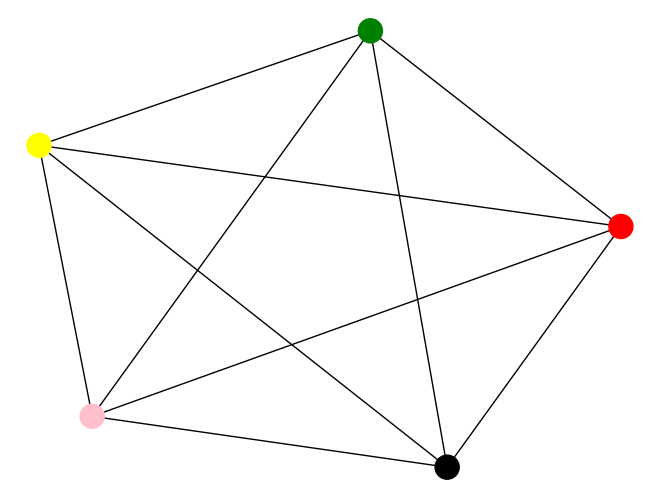

In [ ]:
nx.draw(G, node_color = ['red', 'pink', 'yellow', 'black', 'green'])
import matplotlib.pyplot as plt
plt.show()

In [ ]:
import networkx as nx
import numpy as np
import string
import operator

In [ ]:
list_speaker_14 = df_new_env_14['speaker'].tolist()
list_party_14 = df_new_env_14['party'].tolist()
list_speaker_15 = df_new_env_15['speaker'].tolist()
list_party_15 = df_new_env_15['party'].tolist()

In [ ]:
def color_map(ls_pt):
  color_map = []
  for party in ls_pt:
    if party == "SPD":
      color_map.append('red')
    elif party == "FDP":
      color_map.append('yellow')
    elif party == "PDS/LINKE":
      color_map.append('blue')
    elif party == "GRUENE":
      color_map.append('green')
    elif party == "CDU/CSU":
      color_map.append('black')
    return color_map
def green_map(ls_pt):
  color_map = []
  for party in ls_pt:
    if party == "GRUENE":
      color_map.append('green')
    else:
      color_map.append('silver')
  return color_map
def union_map(ls_pt):
  color_map = []
  for party in ls_pt:
    if party == "CDU/CSU":
      color_map.append('black')
    else:
      color_map.append('silver')
  return color_map


In [ ]:
green_map_14 = green_map(list_party_14)
green_map_15 = green_map(list_party_15)
union_map_14 = union_map(list_party_14)
union_map_15 = union_map(list_party_15)

In [ ]:
print(len(green_map_15))
print(len(list_party_15))

1195
1195


In [ ]:
G = nx.Graph()


In [ ]:
for index, row in df_graph.iterrows():
  G.add_edge(row['From'], row['To'], length = row['Dist'])


In [ ]:
import matplotlib.pyplot as plt
ego = 'CDU-Mean'
pos = nx.spring_layout(G,)
hub_ego = nx.ego_graph(G, n = ego)

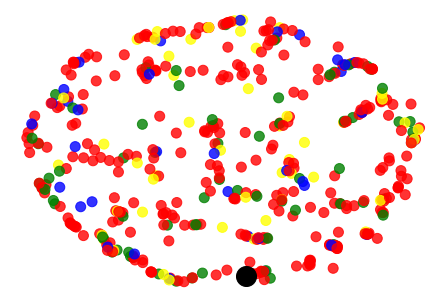

In [ ]:
nx.draw(hub_ego, pos, node_color=color_map, edge_color='white' , node_size=100, alpha=0.8)
options = {"node_size": 400, "node_color": "black"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[ego], **options)

In [ ]:
mds = MDS(n_components=2, eps = 0.009, n_jobs=1, dissimilarity='precomputed', random_state=1607)
XY_transformed_14 = mds.fit_transform(sim_matrix_14)
XY_transformed_15 = mds.fit_transform(sim_matrix_15)


In [ ]:
mds = MDS(n_components=1, eps = 0.009, n_jobs=1, dissimilarity='precomputed', random_state=1607)
X = mds.fit_transform(sim_matrix_14)

In [ ]:
X.shape

(1693, 1)

In [ ]:
x_14 = XY_transformed_14[:,0]
y_14 = XY_transformed_14[:,1]
x_15 = XY_transformed_15[:,0]
y_15 = XY_transformed_15[:,1]

In [ ]:
d_14 = {'x': x_14, 'y': y_14, 'party': list_party_14}
df_scaled_14 = pd.DataFrame(data = d_14)
d_15 = {'x': x_15, 'y': y_15, 'party': list_party_15}
df_scaled_15 = pd.DataFrame(data = d_15)

In [ ]:
len(d_14['x'])

1693

In [ ]:
result_14 = df_scaled_14.groupby(['party'], as_index=False).agg(
                      {'x':['mean','std', 'count'],'y': ['mean', 'std', 'count']})

In [ ]:
result_15 = df_scaled_15.groupby(['party'], as_index=False).agg(
                      {'x':['mean','std', 'count'],'y': ['mean', 'std', 'count']})

In [ ]:
result_14


party         x                         y                
                  mean       std count      mean       std count
0    CDU/CSU -0.004328  0.170268   558  0.000679  0.168469   558
1        FDP  0.017120  0.204529   142  0.005021  0.213426   142
2     GRUENE  0.016413  0.218752   182 -0.015828  0.254206   182
3  PDS/LINKE -0.029688  0.196550   115 -0.011428  0.188532   115
4        SPD  0.000590  0.181318   696  0.004458  0.171859   696

In [ ]:
min(x_14)

-0.5505118437467091

In [ ]:
import math
x = result_14['x']['mean']
y = result_14['y']['mean']
sqrt_n = [math.sqrt(n) for n in result_14['x']['count']]
x_err = result_14['x']['std'].div(sqrt_n)
y_err = result_14['y']['std'].div(sqrt_n)


In [ ]:
x_err

0    0.007208
1    0.017164
2    0.016215
3    0.018328
4    0.006873
dtype: float64

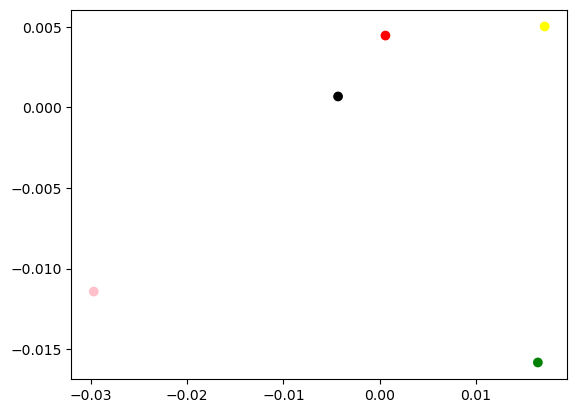

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y, c = ['black','yellow', 'green','pink', 'red'])
plt.show()

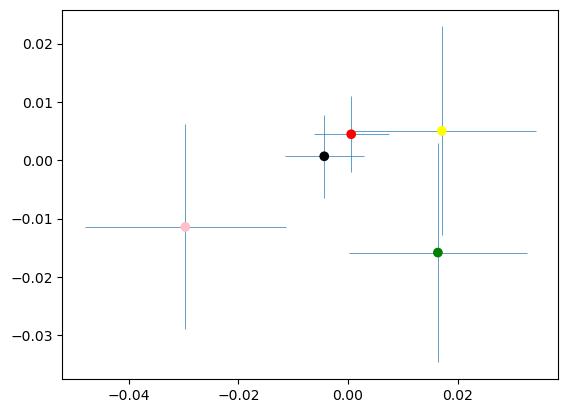

In [ ]:
import matplotlib.pyplot as plt
scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

plt.scatter(x,y, c = ['black','yellow', 'green','pink', 'red'], **scatter_kwargs)
plt.errorbar(x,y,xerr = x_err, yerr = y_err, linestyle='None', **error_kwargs)
plt.show()

In [ ]:
x = result_15['x']['mean']
y = result_15['y']['mean']
sqrt_n = [math.sqrt(n) for n in result_15['x']['count']]
x_err = result_15['x']['std'].div(sqrt_n)
y_err = result_15['y']['std'].div(sqrt_n)


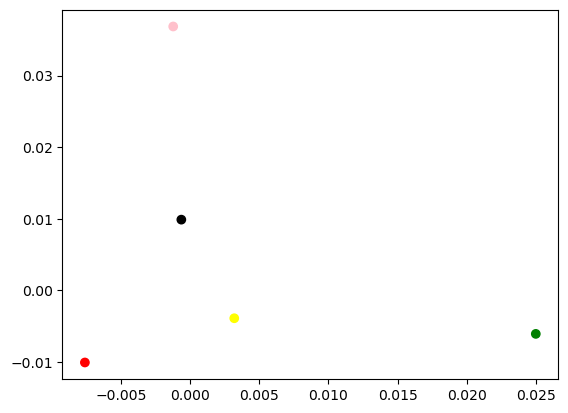

In [ ]:
plt.scatter(x,y, c = ['black','yellow', 'green','pink', 'red'])
plt.show()

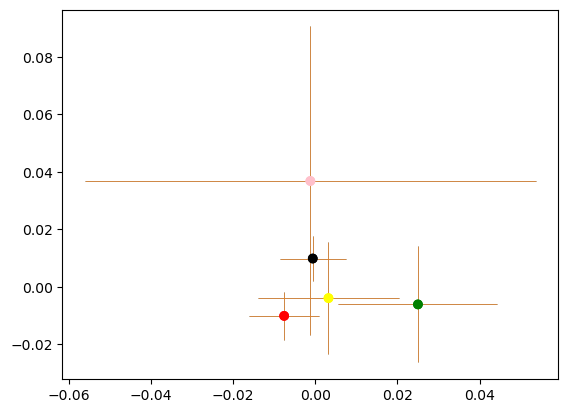

In [ ]:
import matplotlib.pyplot as plt
scatter_kwargs = {"zorder":100}
error_kwargs = {"lw":.5, "zorder":0}

plt.scatter(x,y, c = ['black','yellow', 'green','pink', 'red'], **scatter_kwargs)
plt.errorbar(x,y,xerr = x_err, yerr = y_err, linestyle='None', **error_kwargs)
plt.show()

In [ ]:
import pickle
file_name = "embeddings.pkl"
open_file = open(file_name, "wb")
pickle.dump(embeddings, open_file)
open_file.close()

In [ ]:
file_name = "combinations.pkl"
open_file = open(file_name, "wb")
pickle.dump(combinations, open_file)
open_file.close()

In [ ]:
class Graph(object):
	"""description of class"""
	def __init__(self, nodes = [], edges = [], symmetric = True):
		self.nodes = nodes
		self.edges = []
		for edge in edges:
			self.add_edge(edge)
		self.build_adjacency_matrix(symmetric)

	def add_node(self, node):
		self.nodes.append(node)

	def add_edge(self, edge):
		if len(edge) != 3: 
			raise ValueError('An edge needs to have three values: starting node, ending node, and the weight (1 for unweighted graph)')
		if edge[0] not in self.nodes:
			raise ValueError('Starting node of the edge is unknown, i.e., not in the node list of the graph')
		if edge[1] not in self.nodes:
			raise ValueError('Ending node of the edge is unknown, i.e., not in the node list of the graph')
		self.edges.append((self.nodes.index(edge[0]), self.nodes.index(edge[1]), edge[2]))

	def build_adjacency_matrix(self, symmetric = True):
		self.adj_mat = np.zeros((len(self.nodes), len(self.nodes)))
		for edge in self.edges:
			self.adj_mat[edge[0]][edge[1]] = edge[2]
			if symmetric:
				self.adj_mat[edge[1]][edge[0]] = edge[2]

	def harmonic_function_label_propagation(self, fixed_indices_vals, rescale_extremes = True, normalize = True):
		self.wedeg_mat = np.zeros((len(self.nodes), len(self.nodes)))
		for i in range(len(self.nodes)):
			self.wedeg_mat[i][i] = sum(self.adj_mat[i])
			
		lap_mat = np.subtract(self.wedeg_mat, self.adj_mat)
		lap_mat_uu = lap_mat[np.ix_([x for x in range(len(self.nodes)) if x not in [y[0] for y in fixed_indices_vals]], [x for x in range(len(self.nodes)) if x not in [y[0] for y in fixed_indices_vals]])]
		lap_mat_ul = lap_mat[np.ix_([x for x in range(len(self.nodes)) if x not in [y[0] for y in fixed_indices_vals]], [y[0] for y in fixed_indices_vals])]
		scores_l = np.expand_dims(np.array([y[1] for y in fixed_indices_vals]), axis = 0)
		
		scores_u = np.dot(np.dot(np.multiply(-1.0, np.linalg.inv(lap_mat_uu)), lap_mat_ul), scores_l.T)
		unlab_docs = [x for x in self.nodes if self.nodes.index(x) not in [y[0] for y in fixed_indices_vals]]
		all_scores = dict(zip(unlab_docs, scores_u.T[0]))
		
		for e in fixed_indices_vals:
			if not rescale_extremes:
				all_scores[self.nodes[e[0]]] = e[1]
			else: 
				adj_row = self.adj_mat[e[0]]
				adj_row = np.multiply(1.0 / np.sum(adj_row), adj_row)
				all_scores[self.nodes[e[0]]] = sum([adj_row[i] * all_scores[self.nodes[i]] for i in range(len(self.nodes)) if i not in [y[0] for y in fixed_indices_vals]]) 

		if normalize:
			min_score = min(all_scores.values())
			max_score = max(all_scores.values())
			for k in all_scores:
				all_scores[k] = (all_scores[k] - min_score) / (max_score - min_score)
		return all_scores
		
	
	def pagerank(self, alpha = 0.15, init_pr_vector = None, fixed_indices = None, rescale_extremes = True):
		#print("Running PageRank...")
		if init_pr_vector is None:
			init_pr_vector = np.expand_dims(np.full((len(self.nodes)), 1.0/((float)(len(self.nodes)))), axis = 0)
		
		# normalization and stochasticity adjustment of the adjacence matrix
		pr_mat = np.zeros((len(self.nodes), len(self.nodes)))
		for i in range(len(self.nodes)):
			if np.count_nonzero(self.adj_mat[i]) == 0:
				pr_mat[i][:] = np.full((len(self.nodes)), 1.0/((float)(len(self.nodes))))
			else:
				pr_mat[i][:] =  np.multiply(1.0 / np.sum(self.adj_mat[i]), self.adj_mat[i])

		# primitivity adjustment
		pr_mat = np.multiply(1 - alpha, pr_mat) + np.multiply(alpha, np.full((len(self.nodes), len(self.nodes)), 1.0/((float)(len(self.nodes)))))

		# pagerank iterations
		diff = 1
		it = 1
		while diff > 0.001:
			old_vec = init_pr_vector
			init_pr_vector = np.dot(init_pr_vector, pr_mat)
			#init_pr_vector = np.multiply(1.0 / np.sum(init_pr_vector), init_pr_vector)
			
			if fixed_indices is not None:
				for ind in fixed_indices:	
					init_pr_vector[0][ind] = fixed_indices[ind]

			diff = np.sum(np.abs(init_pr_vector - old_vec))
			#print("PR iteration " + str(it) + ": " + str(init_pr_vector))
			it += 1
		
		
		if fixed_indices is not None and rescale_extremes:
				for ind in fixed_indices:	
					adj_row = self.adj_mat[ind]
					adj_row = np.multiply(1.0 / np.sum(adj_row), adj_row)
					init_pr_vector[0][ind] = sum([adj_row[i] * init_pr_vector[0][i] for i in range(len(self.nodes)) if i != ind]) 

		return dict(zip(self.nodes, init_pr_vector[0]))

In [ ]:
class Scaling:
  def __init__(self, dataframe, scale_method='all'):
    self.df = dataframe
    self.method = scale_method
  def create_df(self, topic_to_scale=None, cabinet_to_scale=None):
    self.df.cabinet = pd.to_numeric(self.df.cabinet, errors='coerce')
    if self.method == 'by_topic':
        self.topic = topic_to_scale
        df_temp = self.df[self.df.topic_name == self.topic]
    if self.method == 'by_cabinet':
      if cabinet_to_scale==None:
        raise ValueError('You need to input the cabinet to scale')
      else:
        df_temp = self.df[(self.df.topic_name == topic_to_scale) & (self.df.cabinet == cabinet_to_scale)]
    if self.method not in ['all','by_topic', 'by_cabinet']:
      raise ValueError('Unknown method!')
    return df_temp
  def scale_each(self, df_to_scale):
    embed = df_to_scale['embed'].tolist()
    if not type(embed[0]).__module__ == np.__name__:
      embed = [t.cpu().detach().numpy() for t in embed]
    distance_matrix = cosine_similarity(embed, embed)
    upper_values = distance_matrix[np.triu_indices(len(distance_matrix[0]), k=1)]
    upper_indices = np.triu_indices_from(distance_matrix, k=1)
    upper_indices = np.array(upper_indices)
    max_val = max(upper_values)
    min_val = min(upper_values)
    max_pos = [i for i, j in enumerate(upper_values) if j == max_val]
    min_pos = [i for i, j in enumerate(upper_values) if j == min_val]
    max_index = upper_indices[:,max_pos]
    max_index = [item for sublist in max_index for item in sublist]
    min_index = upper_indices[:,min_pos]
    min_index = [item for sublist in min_index for item in sublist]
    upper_values = (upper_values - min_val)/(max_val-min_val)
    new_list = list(zip(upper_indices[0], upper_indices[1], upper_values))
    min_sim_pair = [x for x in new_list if x[2] == 0.0]
    fixed = [(min_sim_pair[0][0], -1.0), (min_sim_pair[0][1], 1.0)]
    g = Graph(nodes = [x for x in range(len(distance_matrix[0]))], edges = new_list)
    res = g.harmonic_function_label_propagation(fixed, rescale_extremes = True, normalize = True)
    filenames = [x for x in range(len(distance_matrix))]
    score = list(res.values())
    df_to_scale['score'] = score
    df_to_scale = df_to_scale.drop(columns =['embed']).reset_index()
    return df_to_scale, score
  def scale_all(self):
    self.df.cabinet = pd.to_numeric(self.df.cabinet, errors='coerce')
    if self.method == 'all':
      df_list = []
      for topic in set(self.df.topic_name):
        for cabinet in set(self.df.cabinet):
          df_temp = self.df[(self.df.topic_name == topic) & (self.df.cabinet == cabinet)]
          if len(df_temp) == 0:
            pass
          else:
            result,_ = self.scale_each(df_temp)
            df_list.append(result)
      df_final = pd.concat(df_list)
      df_final = df_final.sort_values(by=['topic_name','cabinet','party'], ascending=True).reset_index() 
      df_final = df_final[['topic_name', 'cabinet', 'party', 'score']]   
    return df_final


In [ ]:
scale = Scaling(df_new, scale_method='all')

In [ ]:
df_final.to_csv('parlspeech_byspeaker_scaled.csv')

In [ ]:
df_final.head()

,topic_name,cabinet,party,score
0,Agriculture,14,CDU/CSU,0.440836
1,Agriculture,14,CDU/CSU,0.482125
2,Agriculture,14,CDU/CSU,0.332891
3,Agriculture,14,CDU/CSU,0.744812
4,Agriculture,14,CDU/CSU,0.281511


In [ ]:
import matplotlib.pyplot as plt
df_temp = df_final[df_final.topic_name == 'Economics']
x1 = df_temp.loc[df.party == "CDU/CSU",'cos_sim']
x2 = df_temp.loc[df.party == "FDP",'cos_sim']
x3 = df_temp.loc[df.party == "GRUENE",'cos_sim']
x4 = df_temp.loc[df.party == "PDS/LINKE",'cos_sim']
x5 = df_temp.loc[df.party == "SPD",'cos_sim']
x6 = df_temp.loc[df.party == "Independent",'cos_sim']
kwargs = dict(alpha=0.5, bins=1000)

plt.hist(x1, **kwargs, color='green', label='Union')
plt.hist(x2, **kwargs, color='black', label='FDP')
plt.hist(x3, **kwargs, color='red', label='GRUENE')
plt.hist(x4, **kwargs, color='yellow', label='PDS/LINKE')
plt.hist(x5, **kwargs, color='purple', label='SPD')
plt.hist(x6, **kwargs, color='blue', label='Independent')

In [ ]:
max_pos = [i for i, j in enumerate(upper_values) if j == max_val]
min_pos = [i for i, j in enumerate(upper_values) if j == min_val]
max_index = upper_indices[:,max_pos]
max_index = [item for sublist in max_index for item in sublist]
min_index = upper_indices[:,min_pos]
min_index = [item for sublist in min_index for item in sublist]

# New scaling procedure

In [ ]:
from transformers import AutoModelForMaskedLM
import logging


In [ ]:
logging.basicConfig(format = '%(asctime)s - %(levelname)s - %(name)s -   %(message)s', 
                    datefmt = '%m/%d/%Y %H:%M:%S',
                    level = logging.INFO)
logger = logging.getLogger(__name__)

In [ ]:
bert_model = 'bert-base-german-dbmdz-cased'
tokenizer = AutoTokenizer.from_pretrained(bert_model)

10/19/2021 10:10:06 - DEBUG - filelock -   Attempting to acquire lock 140308084093136 on /root/.cache/huggingface/transformers/e5aff4e0bba6bc99d75412ace80dae431c5f0f05f7d6952edd5dfc04b5617617.ec5c189f89475aac7d8cbd243960a0655cfadc3d0474da8ff2ed0bf1699c2a5f.lock
10/19/2021 10:10:06 - DEBUG - filelock -   Lock 140308084093136 acquired on /root/.cache/huggingface/transformers/e5aff4e0bba6bc99d75412ace80dae431c5f0f05f7d6952edd5dfc04b5617617.ec5c189f89475aac7d8cbd243960a0655cfadc3d0474da8ff2ed0bf1699c2a5f.lock


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

10/19/2021 10:10:07 - DEBUG - filelock -   Attempting to release lock 140308084093136 on /root/.cache/huggingface/transformers/e5aff4e0bba6bc99d75412ace80dae431c5f0f05f7d6952edd5dfc04b5617617.ec5c189f89475aac7d8cbd243960a0655cfadc3d0474da8ff2ed0bf1699c2a5f.lock
10/19/2021 10:10:07 - DEBUG - filelock -   Lock 140308084093136 released on /root/.cache/huggingface/transformers/e5aff4e0bba6bc99d75412ace80dae431c5f0f05f7d6952edd5dfc04b5617617.ec5c189f89475aac7d8cbd243960a0655cfadc3d0474da8ff2ed0bf1699c2a5f.lock
10/19/2021 10:10:08 - DEBUG - filelock -   Attempting to acquire lock 140309198848272 on /root/.cache/huggingface/transformers/6442aec9861ecb388b7862f29ad559d5e33ebf62f5cc7eaf84f960e43972f43b.6ec690b98e01c56d26601258d2be34c3e5a76b949465ed58983cff81e5f9fa88.lock
10/19/2021 10:10:08 - DEBUG - filelock -   Lock 140309198848272 acquired on /root/.cache/huggingface/transformers/6442aec9861ecb388b7862f29ad559d5e33ebf62f5cc7eaf84f960e43972f43b.6ec690b98e01c56d26601258d2be34c3e5a76b949465ed58

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

10/19/2021 10:10:08 - DEBUG - filelock -   Attempting to release lock 140309198848272 on /root/.cache/huggingface/transformers/6442aec9861ecb388b7862f29ad559d5e33ebf62f5cc7eaf84f960e43972f43b.6ec690b98e01c56d26601258d2be34c3e5a76b949465ed58983cff81e5f9fa88.lock
10/19/2021 10:10:08 - DEBUG - filelock -   Lock 140309198848272 released on /root/.cache/huggingface/transformers/6442aec9861ecb388b7862f29ad559d5e33ebf62f5cc7eaf84f960e43972f43b.6ec690b98e01c56d26601258d2be34c3e5a76b949465ed58983cff81e5f9fa88.lock
10/19/2021 10:10:10 - DEBUG - filelock -   Attempting to acquire lock 140308141327952 on /root/.cache/huggingface/transformers/a117b3379832a232a4e714f36d3defd77ef623802aada3c115d80f2396a507e1.4d65bbd3b91f2762e9d2c779d48ab14052439d3fcc8c3d2fe78c7322a9ac8d64.lock
10/19/2021 10:10:10 - DEBUG - filelock -   Lock 140308141327952 acquired on /root/.cache/huggingface/transformers/a117b3379832a232a4e714f36d3defd77ef623802aada3c115d80f2396a507e1.4d65bbd3b91f2762e9d2c779d48ab14052439d3fcc8c3d2f

Downloading:   0%|          | 0.00/234k [00:00<?, ?B/s]

10/19/2021 10:10:11 - DEBUG - filelock -   Attempting to release lock 140308141327952 on /root/.cache/huggingface/transformers/a117b3379832a232a4e714f36d3defd77ef623802aada3c115d80f2396a507e1.4d65bbd3b91f2762e9d2c779d48ab14052439d3fcc8c3d2fe78c7322a9ac8d64.lock
10/19/2021 10:10:11 - DEBUG - filelock -   Lock 140308141327952 released on /root/.cache/huggingface/transformers/a117b3379832a232a4e714f36d3defd77ef623802aada3c115d80f2396a507e1.4d65bbd3b91f2762e9d2c779d48ab14052439d3fcc8c3d2fe78c7322a9ac8d64.lock
10/19/2021 10:10:12 - DEBUG - filelock -   Attempting to acquire lock 140308083888912 on /root/.cache/huggingface/transformers/e2a992b52af8e6bb80f374f58b866d20161ed7b61d1ddaec167a196153ab0aa5.427a4a69da815751f698c649e071f9d0c6c9f0e6630a2da72e22342b013c8d3d.lock
10/19/2021 10:10:12 - DEBUG - filelock -   Lock 140308083888912 acquired on /root/.cache/huggingface/transformers/e2a992b52af8e6bb80f374f58b866d20161ed7b61d1ddaec167a196153ab0aa5.427a4a69da815751f698c649e071f9d0c6c9f0e6630a2da7

Downloading:   0%|          | 0.00/468k [00:00<?, ?B/s]

10/19/2021 10:10:14 - DEBUG - filelock -   Attempting to release lock 140308083888912 on /root/.cache/huggingface/transformers/e2a992b52af8e6bb80f374f58b866d20161ed7b61d1ddaec167a196153ab0aa5.427a4a69da815751f698c649e071f9d0c6c9f0e6630a2da72e22342b013c8d3d.lock
10/19/2021 10:10:14 - DEBUG - filelock -   Lock 140308083888912 released on /root/.cache/huggingface/transformers/e2a992b52af8e6bb80f374f58b866d20161ed7b61d1ddaec167a196153ab0aa5.427a4a69da815751f698c649e071f9d0c6c9f0e6630a2da72e22342b013c8d3d.lock


In [ ]:
df = pd.read_csv("parlspeech_pred.csv", encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [ ]:
def year_to_cabinet(df):
  cab = []
  df['year'] = df['year'].astype(int)
  for year in df['year']:
    if 1991 <= year <= 1994:
      cab.append(12)
    elif 1995 <= year <= 1998:
      cab.append(13)
    elif 1999 <= year <= 2002:
      cab.append(14)
    elif 2003 <= year <= 2005:
      cab.append(15)
    elif 2006 <= year <= 2009:
      cab.append(16)
    elif 2010 <= year <= 2013:
      cab.append(17)
    elif 2014 <= year <= 2017:
      cab.append(18)
  return cab 



In [ ]:
df['cabinet'] = year_to_cabinet(df)

In [ ]:
df = df[~df.party.isin(['independent'])]
df = df[~df.topic_name.isin(['Other'])]
df = df.dropna(subset=['topic_name','party','cabinet'])

10/19/2021 10:11:19 - INFO - numexpr.utils -   NumExpr defaulting to 4 threads.


In [ ]:
df['cabinet_str'] = df['cabinet'].astype(str)
df['year_str'] = df['year'].astype(str)

In [ ]:
## Sample 50 cases from each category for manual checking
df_sample = df.groupby('topic_name').sample(n=100, random_state=1234).reset_index()

In [ ]:
l = ['apple','bat','apple','car','pet','bat']
d = dict([(y,x) for x,y in enumerate(sorted(set(l)))])
print(d)


{'apple': 0, 'bat': 1, 'car': 2, 'pet': 3}


In [ ]:
## This code chunk is rewritten from extract_features.py: https://github.com/dnanhkhoa/pytorch-pretrained-BERT/blob/master/examples/extract_features.py
def convert_texts_to_features(df, tokenizer, block_size):
    features_list = []
    df['identifier'] = df['topic_name'].str.cat(others=[df.party], sep='-')
    for iden in set(df['identifier']):
      df_temp = df[df.identifier == iden]
      texts = df_temp['text']
      for index, text in enumerate(texts): 
        tokens_from_tokenizer = tokenizer.tokenize(text)
        tokens = []
        tokens.append("[CLS]") ## CLS is the sentence embeddings
        for token in tokens_from_tokenizer:
            tokens.append(token)
        tokens.append("[SEP]") ## SEP for regrouping sentences later
        input_ids = tokenizer.convert_tokens_to_ids(tokens)
        # The mask has 1 for real tokens and 0 for padding tokens. Only real
        # tokens are attended to.
        input_mask = [1] * len(input_ids)

        # Zero-pad up to the sequence length.
        while len(input_ids) < seq_length:
            input_ids.append(0)
            input_mask.append(0)

        assert len(input_ids) == seq_length
        assert len(input_mask) == seq_length
        features = {'unique_id': index, 'tokens': tokens, 'input_ids': input_ids, 'input_mask': input_mask}
        features_list.append(features)
     
    return features_list

In [ ]:
flist = convert_texts_to_features(df_sample, tokenizer= tokenizer, seq_length = 256)

In [ ]:
flist[100][0]

'Energy-PDS/LINKE-2011-Eva Bulling-Schröter'

In [ ]:
df_temp.head(10)

In [ ]:
def group_texts_by_party(df, party,block_size):
    df['identifier'] = df['topic_name'].str.cat(others=[df.party,df.year_str], sep='-')
    for identifier in set(df['identifier']):
      print(identifier)
    
    return concatenated_texts
    total_length = len(concatenated_examples[list(examples.keys())[0]])
    total_length = (total_length // block_size) * block_size
    # Split by chunks of max_len.
    result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }
    result["labels"] = result["input_ids"].copy()
    return result

In [ ]:
features = convert_texts_to_features(df_sample, tokenizer= tokenizer, seq_length = 256)

In [ ]:
def convert_texts_to_features(df, tokenizer, block_size= None):
    df['identifier'] = df['topic_name'].str.cat(others=[df.party,df.year_str], sep='-')
    unique_features = []
    for identifier in set(df['identifier']):
      features_list = []
      df_temp = df[df.identifier == identifier]
      texts = ' '.join(df_temp['text'])
      total_length = len(texts)
      total_length = (total_length // block_size) * block_size
      result = {
        k: [t[i : i + block_size] for i in range(0, total_length, block_size)]
        for k, t in concatenated_examples.items()
    }

convert_texts_to_features(df_sample[:20], tokenizer=tokenizer)



99
143
109
189
120
174
213
184
255
198
341
180
195
166
338
196
79
189
128
142


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_test = df_sample[:10]
texts = df_test['text']
print(' '.join(texts))

Ich denke , dass von der jetzigen Regierung bisher noch kein Problem im Bereich Landwirtschaft , Ernährung und Verbraucherschutz gelöst wurde und keine wirksamen Reformen in Gang gesetzt wurden . Ich bin die letzte , die diese Art und Weise der Tierhaltung verteidigen will . Grüne Gentechnik ist im Grunde nichts anderes als eine andere Form der Züchtung , die schneller , gezielter und breiter in der Anwendung ist . Gleichzeitig müssen nationale Zuständigkeiten für Qualitätswein und die bewährten Weinbereitungsverfahren der nördlichen Anbaugebiete der EU davon unberührt bleiben . Die Landwirtschaft gehört in der Gesamtbetrachtung zu den Bereichen , die von Einsparungen am stärksten betroffen sind . Außerdem  das wird immer wichtiger  wollen viele mit ihrem Kaufverhalten die regionale Wirtschaft stärken und gerade die kleinen Betriebe aus der Gegend, in der sie leben, unterstützen; denn der große Vorteil von regionaler Lebensmittelproduktion und -vermarktung ist, dass sie die Anonymitä

In [ ]:
def group_texts_by_party(df, party=None,block_size=None):
    df['identifier'] = df['topic_name'].str.cat(others=[df.party,df.year_str], sep='-')
    for identifier in set(df['identifier']):
      df_temp = df[df.identifier == identifier].reset_index()
      




Agriculture-CDU/CSU-1995
Agriculture-CDU/CSU-2007
Agriculture-PDS/LINKE-2014
Agriculture-SPD-2016
Agriculture-PDS/LINKE-1992
Agriculture-CDU/CSU-1997
Agriculture-SPD-2008
Agriculture-FDP-1994
Agriculture-CDU/CSU-2016
Agriculture-FDP-2006
     index  Unnamed: 0  Unnamed: 0.1  ...  cabinet cabinet_str year_str
0  1465419     2666962       2666963  ...       16          16     2006
1   118243      205722        205723  ...       12          12     1992
2  1528578     2785338       2785339  ...       16          16     2007
3   382783      684819        684820  ...       13          13     1995
4   364924      653181        653182  ...       12          12     1994
5  2551732     4901356       4901357  ...       18          18     2016
6  2522015     4835980       4835981  ...       18          18     2016
7   594410     1061078       1061079  ...       13          13     1997
8  1669974     3052142       3052143  ...       16          16     2008
9  2345774     4453927       4453928  ... 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_sample.head(10)

,index,Unnamed: 0,Unnamed: 0.1,doc_id,text,date,agenda,speechnumber,speaker,party,party.facts.id,chair,terms,parliament,iso3country,length,pred_topics,topic_name,year,cabinet,cabinet_str,year_str
0,1465419,2666962,2666963,204781.50,"Ich denke , dass von der jetzigen Regierung bi...",2006-09-05,NaN,85,Edmund Peter Geisen,FDP,573.0,False,613,DE-Bundestag,DEU,30,3.0,Agriculture,2006,16,16,2006
1,118243,205722,205723,18123.36,"Ich bin die letzte , die diese Art und Weise d...",1992-05-08,NaN,29,Ursula Fischer,PDS/LINKE,86.0,False,1543,DE-Bundestag,DEU,15,3.0,Agriculture,1992,12,12,1992
2,1528578,2785338,2785339,212127.40,Grüne Gentechnik ist im Grunde nichts anderes ...,2007-03-08,NaN,86,Peter Bleser,CDU/CSU,211.0,False,59,DE-Bundestag,DEU,25,3.0,Agriculture,2007,16,16,2007
3,382783,684819,684820,465810.60,Gleichzeitig müssen nationale Zuständigkeiten ...,1995-03-09,NaN,27,Egon Susset,CDU/CSU,211.0,False,382,DE-Bundestag,DEU,19,3.0,Agriculture,1995,13,13,1995
4,364924,653181,653182,111710.50,Die Landwirtschaft gehört in der Gesamtbetrach...,1994-12-16,NaN,154,Ulrich Heinrich,FDP,573.0,False,708,DE-Bundestag,DEU,18,3.0,Agriculture,1994,12,12,1994
5,2551732,4901356,4901357,106768.80,Außerdem  das wird immer wichtiger  wollen v...,2016-11-10,Tagesordnungspunkt 16: Beratung des Antrags d...,280,Karin Thissen,SPD,383.0,False,415,DE-Bundestag,DEU,48,3.0,Agriculture,2016,18,18,2016
6,2522015,4835980,4835981,1024101.43,Ist ein Kulturgut in einem Vertragsstaat entsp...,2016-06-23,Tagesordnungspunkt 7: Zweite und dritte Berat...,175,Ansgar Heveling,CDU/CSU,211.0,False,1024,DE-Bundestag,DEU,21,3.0,Agriculture,2016,18,18,2016
7,594410,1061078,1061079,387071.99,Erlauben Sie mir deswegen einige Anmerkungen z...,1997-03-14,NaN,50,Meinolf Michels,CDU/CSU,211.0,False,2040,DE-Bundestag,DEU,20,3.0,Agriculture,1997,13,13,1997
8,1669974,3052142,3052143,230193.38,"Doch auf dem Weg dahin ist es notwendig , scho...",2008-06-26,NaN,338,Andrea Wicklein,SPD,383.0,False,1137,DE-Bundestag,DEU,29,3.0,Agriculture,2008,16,16,2008
9,2345774,4453927,4453928,757111.50,"Damals habe ich ausgeführt, dass die Ackerfläc...",2014-10-09,Tagesordnungspunkt 18: Zweite und dritte Bera...,226,Ralph Lenkert,PDS/LINKE,1545.0,False,606,DE-Bundestag,DEU,25,3.0,Agriculture,2014,18,18,2014


In [ ]:
## Load tokenizer and models
from sentence_transformers import SentenceTransformer, LoggingHandler
from sentence_transformers import models, util, datasets, evaluation, losses
from torch.utils.data import DataLoader
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
bert_version = 'T-Systems-onsite/cross-en-de-roberta-sentence-transformer'
word_embedding_model = models.Transformer(bert_version)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(), 'cls')
model = SentenceTransformer(modules=[word_embedding_model, pooling_model]).to(device)


In [ ]:
manifesto = pd.read_csv('manifesto_annotated.csv', encoding='latin-1')

In [ ]:
manifesto = manifesto.dropna()

In [ ]:
manifesto['cabinet_str'] = manifesto['cabinet'].astype(str)

In [ ]:
d = dict(zip(set(manifesto['party_cabinet']), range(0,30)))
d

In [ ]:
manifesto['labels'] = manifesto['party_cabinet'].map(d)

In [ ]:
texts = manifesto['text'].astype(str)

In [ ]:
new_texts = []
for text in texts:
  text = text.replace("\xad","")
  new_texts.append(text)

In [ ]:
train_dataset = datasets.DenoisingAutoEncoderDataset(new_texts)

# DataLoader to batch your data
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Use the denoising auto-encoder loss
train_loss = losses.DenoisingAutoEncoderLoss(model, decoder_name_or_path=bert_version, tie_encoder_decoder=True)

When tie_encoder_decoder=True, the decoder_name_or_path will be invalid.
Some weights of XLMRobertaForCausalLM were not initialized from the model checkpoint at T-Systems-onsite/cross-en-de-roberta-sentence-transformer and are newly initialized: ['encoder.layer.8.crossattention.output.dense.bias', 'encoder.layer.9.crossattention.self.query.bias', 'encoder.layer.11.crossattention.output.dense.weight', 'encoder.layer.9.crossattention.self.key.weight', 'encoder.layer.3.crossattention.self.key.bias', 'encoder.layer.8.crossattention.self.value.weight', 'encoder.layer.10.crossattention.self.query.weight', 'encoder.layer.5.crossattention.self.value.bias', 'encoder.layer.4.crossattention.output.LayerNorm.weight', 'encoder.layer.0.crossattention.output.dense.weight', 'encoder.layer.3.crossattention.output.LayerNorm.weight', 'encoder.layer.7.crossattention.output.LayerNorm.bias', 'encoder.layer.1.crossattention.self.value.weight', 'encoder.layer.2.crossattention.output.LayerNorm.bias', 'encoder.

In [ ]:
model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=2,
    weight_decay=0,
    scheduler='constantlr',
    optimizer_params={'lr': 3e-5},
    show_progress_bar=True
)


In [ ]:
model.save(os.path.join("Hung's paper", "results", "TSDAE", "manifesto"))

In [ ]:
model = SentenceTransformer(os.path.join("Hung's paper", "results", "TSDAE", "manifesto"), device = "cuda")

In [ ]:
manifesto['combi'] = manifesto['cap_topic_name'].str.cat([manifesto.cabinet_str, manifesto.party], sep = "-")

In [ ]:
def iter_embed_manifesto(df):
  df_list = []
  for combi in set(df['combi']):
    df_temp = df[df.combi == combi]
    texts = df_temp['text'].tolist()
    embeddings = model.encode(texts, convert_to_tensor=True, batch_size=32)
    embeddings = [t.cpu().detach().numpy() for t in embeddings]
    df_temp['embed'] = embeddings
    df_list.append(df_temp)
  return df_list

In [ ]:
frames_manifesto = iter_embed_manifesto(manifesto)

In [ ]:
df = pd.concat(frames_manifesto).reset_index()
df = df[['cabinet','party','cap_topic_name','embed']]
df.columns = ['cabinet','party','topic_name','embed']

df.head(5)

,cabinet,party,topic_name,embed
0,2002,FDP,Civil Rights,"[0.047564164, -0.33657867, 0.33431402, -0.1584..."
1,2002,FDP,Civil Rights,"[-0.03657732, -0.13740852, -0.07604497, -0.174..."
2,2002,FDP,Civil Rights,"[-0.114499696, -0.10127597, 0.0043381364, 0.00..."
3,2002,FDP,Civil Rights,"[0.14467256, 0.082161576, 0.18734436, -0.07966..."
4,2002,FDP,Civil Rights,"[0.26855344, 0.26671132, 0.1116112, 0.13699882..."


In [ ]:
## For grouped manifesto
df_1 = pd.DataFrame([embed_manifesto]).T
df_2 = pd.DataFrame([combi_manifesto]).T
df_2 = df_2[0].str.split('-', 2, expand=True)
df = pd.concat([df_1, df_2], axis = 1)
df.columns = ['embed', 'topic_name', 'cabinet', 'party']

In [ ]:
type(df['embed'].tolist()[0]) 

numpy.ndarray

In [ ]:
class Graph(object):
	"""description of class"""
	def __init__(self, nodes = [], edges = [], symmetric = True):
		self.nodes = nodes
		self.edges = []
		for edge in edges:
			self.add_edge(edge)
		self.build_adjacency_matrix(symmetric)

	def add_node(self, node):
		self.nodes.append(node)

	def add_edge(self, edge):
		if len(edge) != 3: 
			raise ValueError('An edge needs to have three values: starting node, ending node, and the weight (1 for unweighted graph)')
		if edge[0] not in self.nodes:
			raise ValueError('Starting node of the edge is unknown, i.e., not in the node list of the graph')
		if edge[1] not in self.nodes:
			raise ValueError('Ending node of the edge is unknown, i.e., not in the node list of the graph')
		self.edges.append((self.nodes.index(edge[0]), self.nodes.index(edge[1]), edge[2]))

	def build_adjacency_matrix(self, symmetric = True):
		self.adj_mat = np.zeros((len(self.nodes), len(self.nodes)))
		for edge in self.edges:
			self.adj_mat[edge[0]][edge[1]] = edge[2]
			if symmetric:
				self.adj_mat[edge[1]][edge[0]] = edge[2]

	def harmonic_function_label_propagation(self, fixed_indices_vals, rescale_extremes = True, normalize = True):
		self.wedeg_mat = np.zeros((len(self.nodes), len(self.nodes)))
		for i in range(len(self.nodes)):
			self.wedeg_mat[i][i] = sum(self.adj_mat[i])
			
		lap_mat = np.subtract(self.wedeg_mat, self.adj_mat)
		lap_mat_uu = lap_mat[np.ix_([x for x in range(len(self.nodes)) if x not in [y[0] for y in fixed_indices_vals]], [x for x in range(len(self.nodes)) if x not in [y[0] for y in fixed_indices_vals]])]
		lap_mat_ul = lap_mat[np.ix_([x for x in range(len(self.nodes)) if x not in [y[0] for y in fixed_indices_vals]], [y[0] for y in fixed_indices_vals])]
		scores_l = np.expand_dims(np.array([y[1] for y in fixed_indices_vals]), axis = 0)
		
		scores_u = np.dot(np.dot(np.multiply(-1.0, np.linalg.inv(lap_mat_uu)), lap_mat_ul), scores_l.T)
		unlab_docs = [x for x in self.nodes if self.nodes.index(x) not in [y[0] for y in fixed_indices_vals]]
		all_scores = dict(zip(unlab_docs, scores_u.T[0]))
		
		for e in fixed_indices_vals:
			if not rescale_extremes:
				all_scores[self.nodes[e[0]]] = e[1]
			else: 
				adj_row = self.adj_mat[e[0]]
				adj_row = np.multiply(1.0 / np.sum(adj_row), adj_row)
				all_scores[self.nodes[e[0]]] = sum([adj_row[i] * all_scores[self.nodes[i]] for i in range(len(self.nodes)) if i not in [y[0] for y in fixed_indices_vals]]) 

		if normalize:
			min_score = min(all_scores.values())
			max_score = max(all_scores.values())
			for k in all_scores:
				all_scores[k] = (all_scores[k] - min_score) / (max_score - min_score)
		return all_scores
		
	
	def pagerank(self, alpha = 0.15, init_pr_vector = None, fixed_indices = None, rescale_extremes = True):
		#print("Running PageRank...")
		if init_pr_vector is None:
			init_pr_vector = np.expand_dims(np.full((len(self.nodes)), 1.0/((float)(len(self.nodes)))), axis = 0)
		
		# normalization and stochasticity adjustment of the adjacence matrix
		pr_mat = np.zeros((len(self.nodes), len(self.nodes)))
		for i in range(len(self.nodes)):
			if np.count_nonzero(self.adj_mat[i]) == 0:
				pr_mat[i][:] = np.full((len(self.nodes)), 1.0/((float)(len(self.nodes))))
			else:
				pr_mat[i][:] =  np.multiply(1.0 / np.sum(self.adj_mat[i]), self.adj_mat[i])

		# primitivity adjustment
		pr_mat = np.multiply(1 - alpha, pr_mat) + np.multiply(alpha, np.full((len(self.nodes), len(self.nodes)), 1.0/((float)(len(self.nodes)))))

		# pagerank iterations
		diff = 1
		it = 1
		while diff > 0.001:
			old_vec = init_pr_vector
			init_pr_vector = np.dot(init_pr_vector, pr_mat)
			#init_pr_vector = np.multiply(1.0 / np.sum(init_pr_vector), init_pr_vector)
			
			if fixed_indices is not None:
				for ind in fixed_indices:	
					init_pr_vector[0][ind] = fixed_indices[ind]

			diff = np.sum(np.abs(init_pr_vector - old_vec))
			#print("PR iteration " + str(it) + ": " + str(init_pr_vector))
			it += 1
		
		
		if fixed_indices is not None and rescale_extremes:
				for ind in fixed_indices:	
					adj_row = self.adj_mat[ind]
					adj_row = np.multiply(1.0 / np.sum(adj_row), adj_row)
					init_pr_vector[0][ind] = sum([adj_row[i] * init_pr_vector[0][i] for i in range(len(self.nodes)) if i != ind]) 

		return dict(zip(self.nodes, init_pr_vector[0]))

In [ ]:
class Scaling:
  def __init__(self, dataframe, scale_method='all'):
    self.df = dataframe
    self.method = scale_method
  def create_df(self, topic_to_scale=None, cabinet_to_scale=None):
    self.df.cabinet = pd.to_numeric(self.df.cabinet, errors='coerce')
    if self.method == 'by_topic':
      df_temp = self.df[self.df.topic_name == topic_to_scale]
    if self.method == 'by_cabinet':
      if cabinet_to_scale==None:
        raise ValueError('You need to input the cabinet to scale')
      else:
        df_temp = self.df[(self.df.topic_name == topic_to_scale) & (self.df.cabinet == cabinet_to_scale)]
    if self.method not in ['all','by_topic', 'by_cabinet']:
      raise ValueError('Unknown method!')
    return df_temp
  def scale_each(self, df_to_scale):
    embed = df_to_scale['embed'].tolist()
    if not type(embed[0]).__module__ == np.__name__:
      embed = [t.cpu().detach().numpy() for t in embed]
    distance_matrix = cosine_similarity(embed, embed)
    upper_values = distance_matrix[np.triu_indices(len(distance_matrix[0]), k=1)]
    upper_indices = np.triu_indices_from(distance_matrix, k=1)
    upper_indices = np.array(upper_indices)
    max_val = max(upper_values)
    min_val = min(upper_values)
    upper_values = (upper_values - min_val)/(max_val-min_val)
    new_list = list(zip(upper_indices[0], upper_indices[1], upper_values))
    min_sim_pair = [x for x in new_list if x[2] == 0.0]
    fixed = [(min_sim_pair[0][0], -1.0), (min_sim_pair[0][1], 1.0)]
    g = Graph(nodes = [x for x in range(len(distance_matrix[0]))], edges = new_list)
    res = g.harmonic_function_label_propagation(fixed, rescale_extremes = True, normalize = True)
    filenames = [x for x in range(len(distance_matrix))]
    score = list(res.values())
    df_to_scale['score'] = score
    df_to_scale = df_to_scale.drop(columns =['embed']).reset_index()
    return df_to_scale, score
  def scale_all(self):
    self.df.cabinet = pd.to_numeric(self.df.cabinet, errors='coerce')
    if self.method == 'all':
      df_list = []
      for topic in set(self.df.topic_name):
        for cabinet in set(self.df.cabinet):
          df_temp = self.df[(self.df.topic_name == topic) & (self.df.cabinet == cabinet)]
          if len(df_temp) == 0:
            pass
          else:
            result,_ = self.scale_each(df_temp)
            df_list.append(result)
      df_final = pd.concat(df_list)
      df_final = df_final.sort_values(by=['topic_name','cabinet','party'], ascending=True).reset_index() 
      df_final = df_final[['topic_name', 'cabinet', 'party', 'score']]   
    return df_final


In [ ]:
scale = Scaling(df, scale_method='all')

In [ ]:
df_final = scale.scale_all()

In [ ]:
df_final.to_csv('manifesto_scaled.csv')

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.manifold import MDS
mds_1 = MDS(n_components =1, dissimilarity='precomputed',random_state=1234)
X_transformed = mds_1.fit_transform(distance_matrix)
mds_2 = MDS(n_components=2, dissimilarity='precomputed',random_state=1234)
XY_transformed = mds_2.fit_transform(distance_matrix)

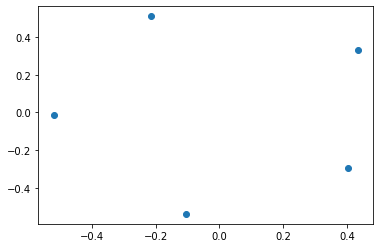

In [ ]:
x = XY_transformed[:,0]
y = XY_transformed[:,1]
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x, y)


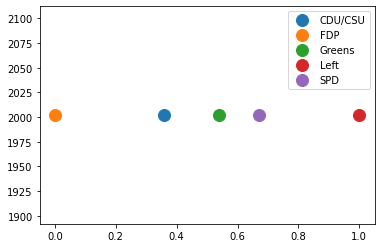

In [ ]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in group:
    ax.plot(group.score, group.cabinet, marker='o', linestyle='', ms=12, label=name)
ax.legend()
